In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.metrics import mean_squared_error

# INFORMATION ABOUT HOME PRICE DATA
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

## SOME SETTINGS FOR PANDAS

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# READ DATAFRAME

In [3]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [4]:
def DataFrame_Check(df,head = 5):
    print("$$$$$$$ HEAD $$$$$$$\n")
    print(df.head(head))
    print("$$$$$$$ TAIL $$$$$$$\n")
    print(df.tail(head))
    print("$$$$$$$ COLUMNS $$$$$$$\n")
    for col in df.columns:
        print(col,end=", ")
    print("$$$$$$$ INFO $$$$$$$\n")
    df.info()
    print("$$$$$$$ DESCRIBE $$$$$$$\n")
    print(df.describe().T)#T matrix transpose
    print("$$$$$$$ SHAPE $$$$$$$\n")
    print(df.shape)
    print("$$$$$$$ NDIM $$$$$$$\n")
    print(df.ndim)
    

In [5]:
DataFrame_Check(df)

$$$$$$$ HEAD $$$$$$$

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL    65.000000     8450   Pave   NaN      Reg   
1   2          20       RL    80.000000     9600   Pave   NaN      Reg   
2   3          60       RL    68.000000    11250   Pave   NaN      IR1   
3   4          70       RL    60.000000     9550   Pave   NaN      IR1   
4   5          60       RL    84.000000    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story 

In [6]:
def grab_columns(df,cat_num = 10, car_num = 30):
    #categorical columns
    cat_col = [col for col in df.columns if df[col].dtype == "O"]
    
    #numerical but categorical columns
    num_but_cat = [col for col in df.columns if (df[col].dtype != "O") and (df[col].nunique() < cat_num)]
    
    #categorical but cardinal columns
    cat_but_car = [col for col in df.columns if (df[col].dtype == "O") and (df[col].nunique() > car_num)]
    
    
    cat_col = cat_col + num_but_cat
    cat_col = [col for col in cat_col if col not in cat_but_car]
    
    num_col = [col for col in df.columns if (df[col].dtype != "O") and (col not in num_but_cat)]
    
    return cat_col, num_col, cat_but_car

In [7]:
cat_col, num_col, car_col = grab_columns(df)

In [8]:
#CATEGORICAL COLUMNS
for col in cat_col:
    print(col,end=", ")

MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition, OverallCond, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageCars, PoolArea, YrSold, 

In [9]:
#NUMERICAL COLUMNS
for col in num_col:
    print(col,end=", ")

Id, MSSubClass, LotFrontage, LotArea, OverallQual, YearBuilt, YearRemodAdd, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, TotRmsAbvGrd, GarageYrBlt, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, MiscVal, MoSold, SalePrice, 

In [10]:
num_col = [col for col in num_col if col != "Id"]

In [11]:
#CARDINAL COLUMNS
for col in car_col:
    print(col,end=", ")

# NUMERICAL ANALYSİS

In [12]:
def numerical_analysis(df,col,plot = False):
    print("ANALYSIS FOR {}\n".format(col))
    quan = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    print(df[col].describe(quan).T)
    
    if plot:
        plt.figure(figsize = (10,10))
        sns.histplot(df[col],kde=True)
        plt.title(col)
        plt.xticks(rotation=30)
        plt.show(block=True)    

ANALYSIS FOR MSSubClass

count   1460.000000
mean      56.897260
std       42.300571
min       20.000000
1%        20.000000
5%        20.000000
10%       20.000000
20%       20.000000
30%       20.000000
40%       30.000000
50%       50.000000
60%       60.000000
70%       60.000000
80%       80.000000
90%      120.000000
95%      160.000000
99%      190.000000
max      190.000000
Name: MSSubClass, dtype: float64


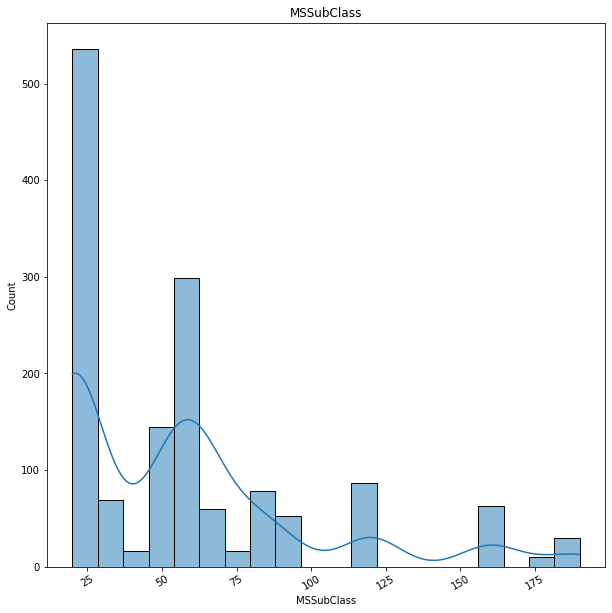

ANALYSIS FOR LotFrontage

count   1201.000000
mean      70.049958
std       24.284752
min       21.000000
1%        21.000000
5%        34.000000
10%       44.000000
20%       53.000000
30%       60.000000
40%       63.000000
50%       69.000000
60%       74.000000
70%       79.000000
80%       85.000000
90%       96.000000
95%      107.000000
99%      141.000000
max      313.000000
Name: LotFrontage, dtype: float64


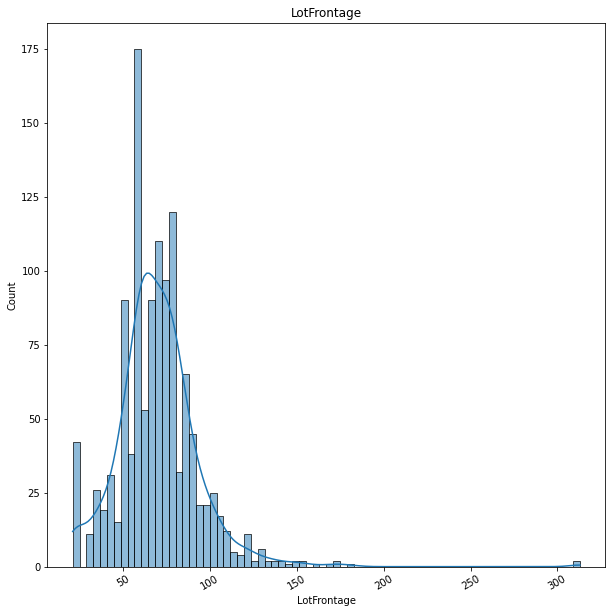

ANALYSIS FOR LotArea

count     1460.000000
mean     10516.828082
std       9981.264932
min       1300.000000
1%        1680.000000
5%        3311.700000
10%       5000.000000
20%       7078.400000
30%       8063.700000
40%       8793.400000
50%       9478.500000
60%      10198.200000
70%      11066.500000
80%      12205.800000
90%      14381.700000
95%      17401.150000
99%      37567.640000
max     215245.000000
Name: LotArea, dtype: float64


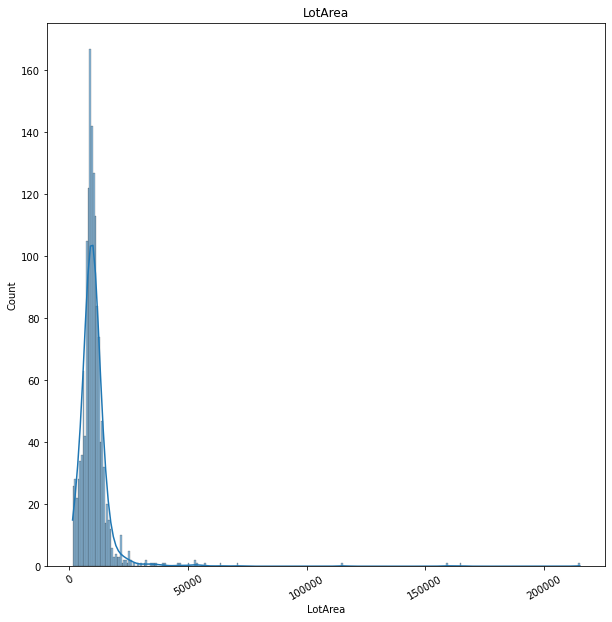

ANALYSIS FOR OverallQual

count   1460.000000
mean       6.099315
std        1.382997
min        1.000000
1%         3.000000
5%         4.000000
10%        5.000000
20%        5.000000
30%        5.000000
40%        6.000000
50%        6.000000
60%        6.000000
70%        7.000000
80%        7.000000
90%        8.000000
95%        8.000000
99%       10.000000
max       10.000000
Name: OverallQual, dtype: float64


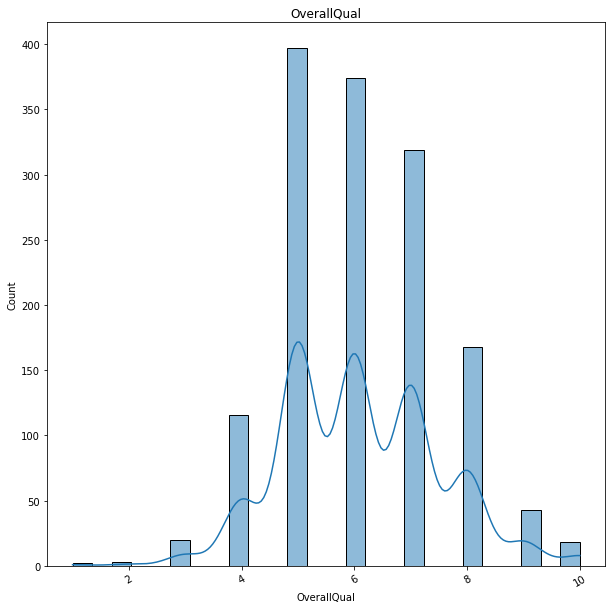

ANALYSIS FOR YearBuilt

count   1460.000000
mean    1971.267808
std       30.202904
min     1872.000000
1%      1899.180000
5%      1916.000000
10%     1924.900000
20%     1947.800000
30%     1958.000000
40%     1965.000000
50%     1973.000000
60%     1984.000000
70%     1997.300000
80%     2003.000000
90%     2006.000000
95%     2007.000000
99%     2009.000000
max     2010.000000
Name: YearBuilt, dtype: float64


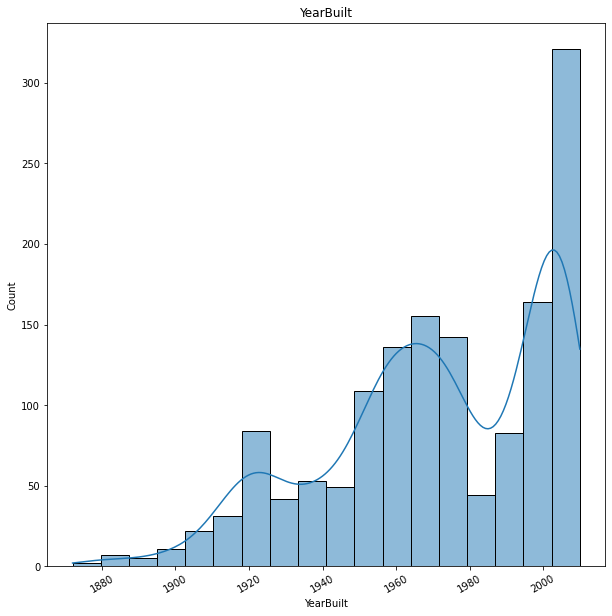

ANALYSIS FOR YearRemodAdd

count   1460.000000
mean    1984.865753
std       20.645407
min     1950.000000
1%      1950.000000
5%      1950.000000
10%     1950.000000
20%     1961.800000
30%     1971.000000
40%     1980.000000
50%     1994.000000
60%     1998.000000
70%     2002.000000
80%     2005.000000
90%     2006.000000
95%     2007.000000
99%     2009.000000
max     2010.000000
Name: YearRemodAdd, dtype: float64


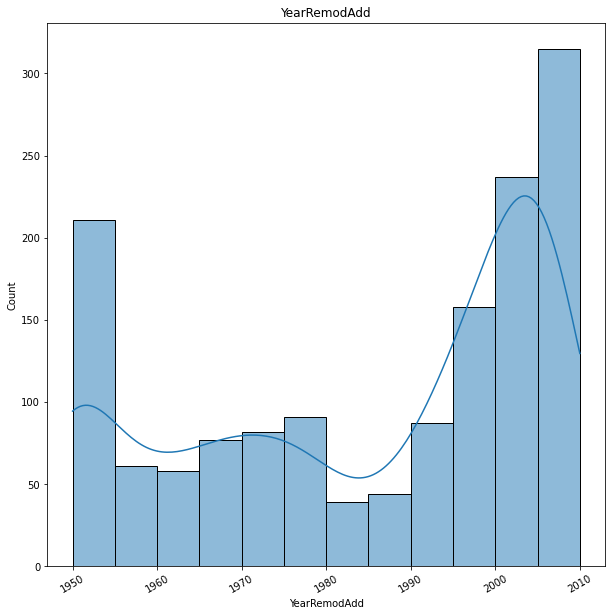

ANALYSIS FOR MasVnrArea

count   1452.000000
mean     103.685262
std      181.066207
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%       16.000000
70%      117.000000
80%      206.000000
90%      335.000000
95%      456.000000
99%      791.920000
max     1600.000000
Name: MasVnrArea, dtype: float64


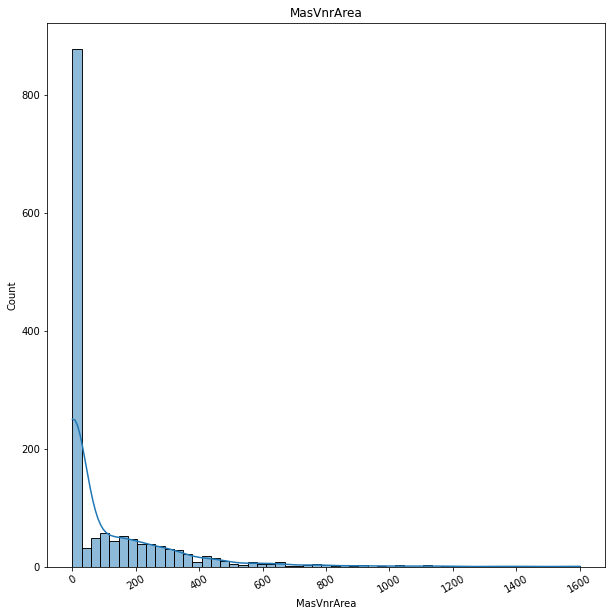

ANALYSIS FOR BsmtFinSF1

count   1460.000000
mean     443.639726
std      456.098091
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%      218.600000
50%      383.500000
60%      525.600000
70%      655.000000
80%      806.400000
90%     1065.500000
95%     1274.000000
99%     1572.410000
max     5644.000000
Name: BsmtFinSF1, dtype: float64


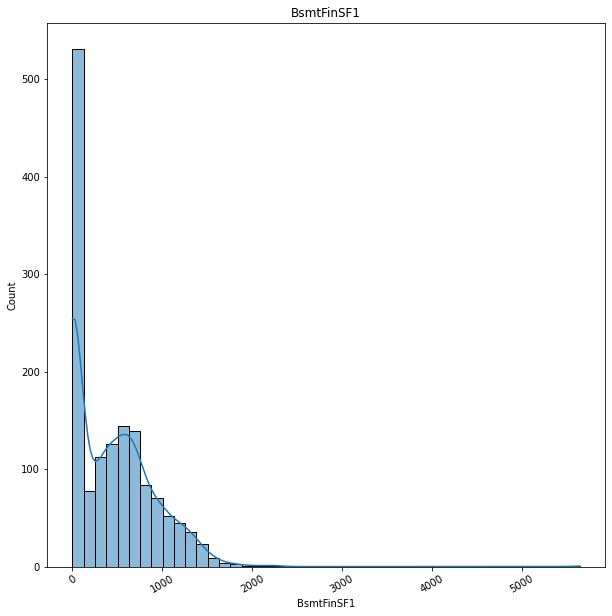

ANALYSIS FOR BsmtFinSF2

count   1460.000000
mean      46.549315
std      161.319273
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        0.000000
90%      117.200000
95%      396.200000
99%      830.380000
max     1474.000000
Name: BsmtFinSF2, dtype: float64


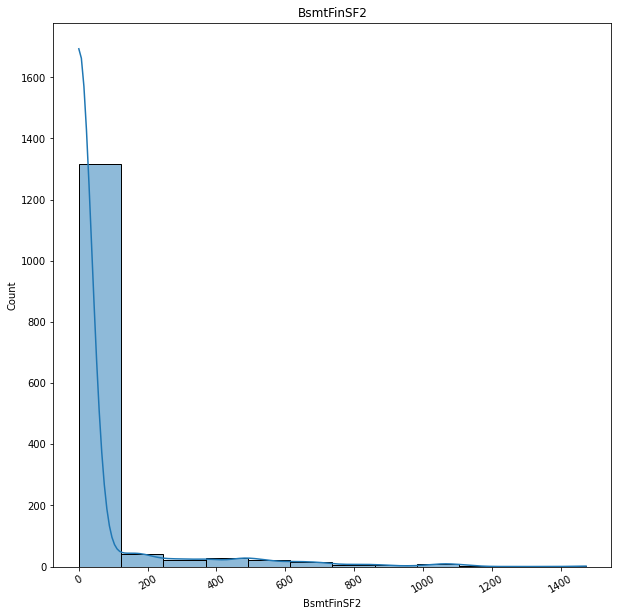

ANALYSIS FOR BsmtUnfSF

count   1460.000000
mean     567.240411
std      441.866955
min        0.000000
1%         0.000000
5%         0.000000
10%       74.900000
20%      172.000000
30%      280.000000
40%      374.600000
50%      477.500000
60%      604.400000
70%      736.000000
80%      896.000000
90%     1232.000000
95%     1468.000000
99%     1797.050000
max     2336.000000
Name: BsmtUnfSF, dtype: float64


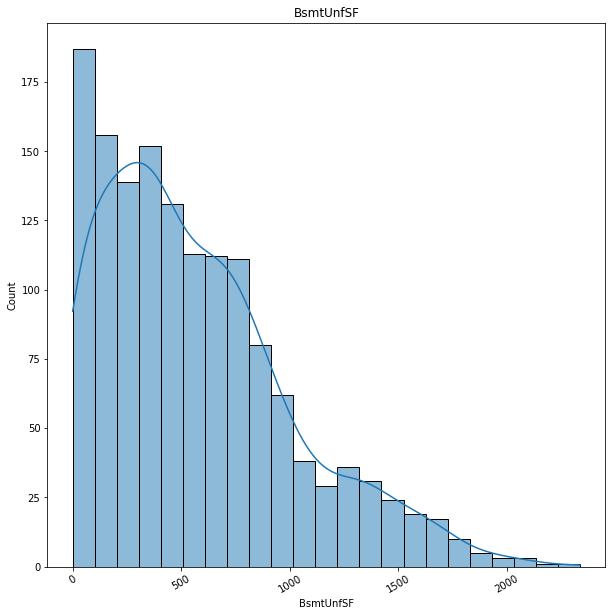

ANALYSIS FOR TotalBsmtSF

count   1460.000000
mean    1057.429452
std      438.705324
min        0.000000
1%         0.000000
5%       519.300000
10%      636.900000
20%      755.800000
30%      840.000000
40%      910.000000
50%      991.500000
60%     1088.000000
70%     1216.000000
80%     1391.200000
90%     1602.200000
95%     1753.000000
99%     2155.050000
max     6110.000000
Name: TotalBsmtSF, dtype: float64


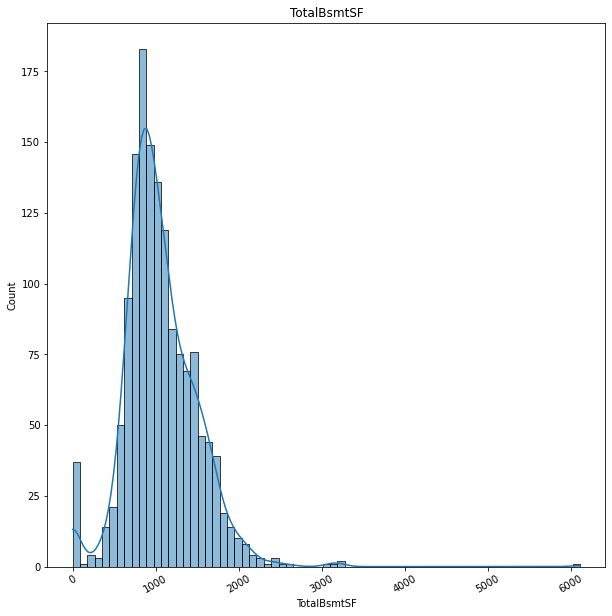

ANALYSIS FOR 1stFlrSF

count   1460.000000
mean    1162.626712
std      386.587738
min      334.000000
1%       520.000000
5%       672.950000
10%      756.900000
20%      848.000000
30%      915.700000
40%     1000.200000
50%     1087.000000
60%     1182.000000
70%     1314.000000
80%     1482.400000
90%     1680.000000
95%     1831.250000
99%     2219.460000
max     4692.000000
Name: 1stFlrSF, dtype: float64


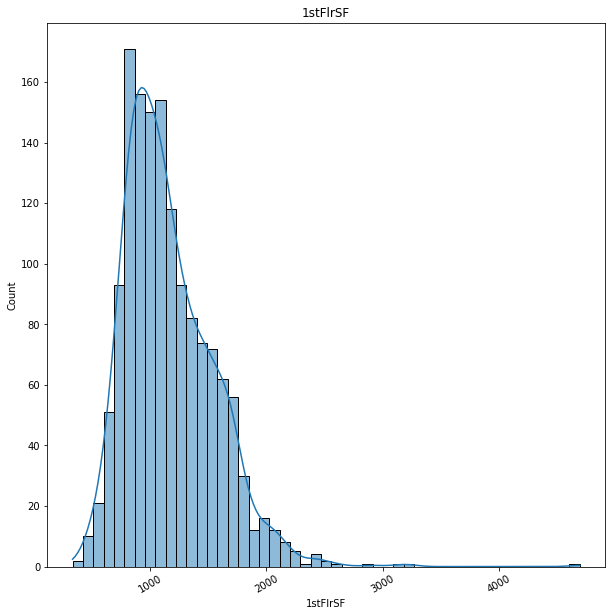

ANALYSIS FOR 2ndFlrSF

count   1460.000000
mean     346.992466
std      436.528436
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%      455.400000
70%      672.000000
80%      796.200000
90%      954.200000
95%     1141.050000
99%     1418.920000
max     2065.000000
Name: 2ndFlrSF, dtype: float64


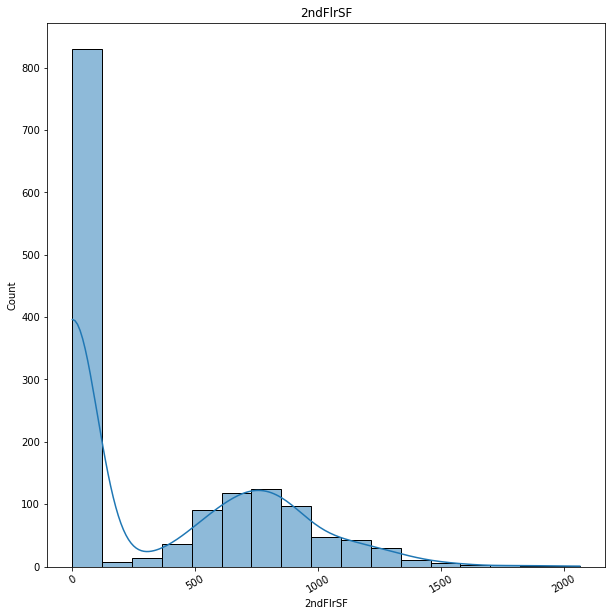

ANALYSIS FOR LowQualFinSF

count   1460.000000
mean       5.844521
std       48.623081
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        0.000000
90%        0.000000
95%        0.000000
99%      360.000000
max      572.000000
Name: LowQualFinSF, dtype: float64


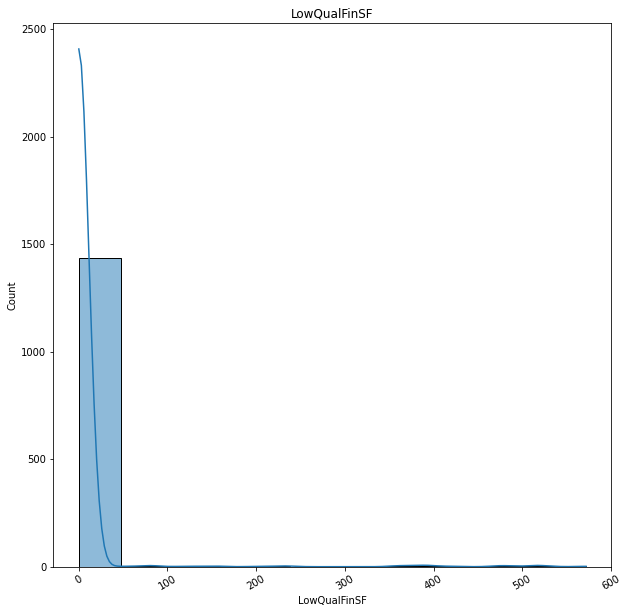

ANALYSIS FOR GrLivArea

count   1460.000000
mean    1515.463699
std      525.480383
min      334.000000
1%       692.180000
5%       848.000000
10%      912.000000
20%     1066.600000
30%     1208.000000
40%     1339.000000
50%     1464.000000
60%     1578.000000
70%     1709.300000
80%     1869.000000
90%     2158.300000
95%     2466.100000
99%     3123.480000
max     5642.000000
Name: GrLivArea, dtype: float64


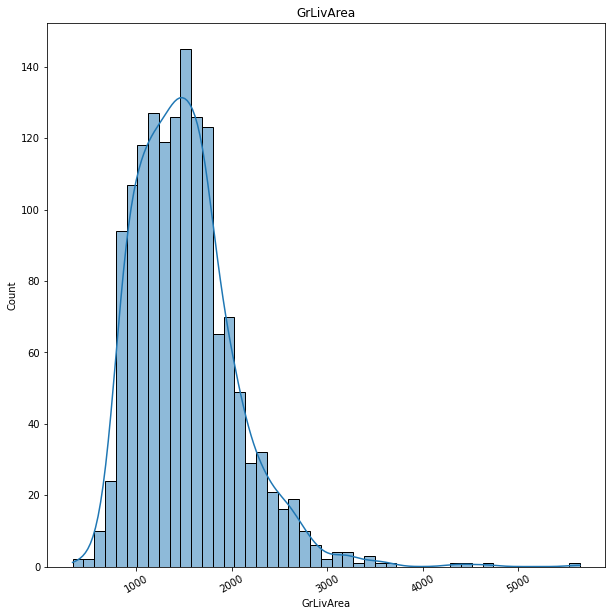

ANALYSIS FOR TotRmsAbvGrd

count   1460.000000
mean       6.517808
std        1.625393
min        2.000000
1%         3.000000
5%         4.000000
10%        5.000000
20%        5.000000
30%        6.000000
40%        6.000000
50%        6.000000
60%        7.000000
70%        7.000000
80%        8.000000
90%        9.000000
95%       10.000000
99%       11.000000
max       14.000000
Name: TotRmsAbvGrd, dtype: float64


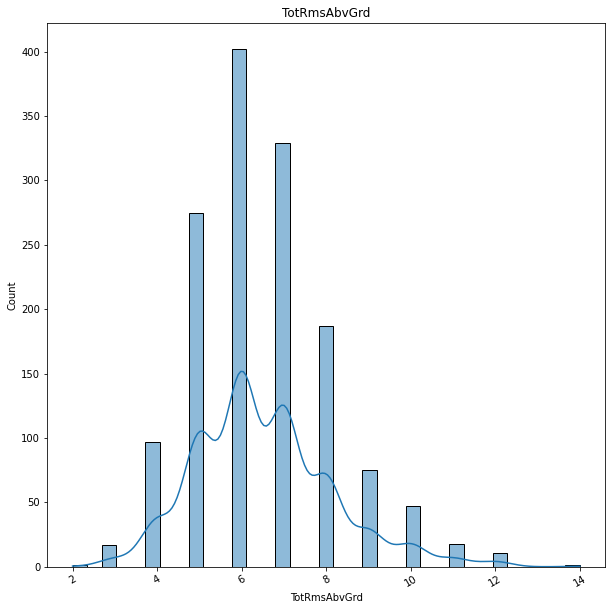

ANALYSIS FOR GarageYrBlt

count   1379.000000
mean    1978.506164
std       24.689725
min     1900.000000
1%      1916.000000
5%      1930.000000
10%     1945.000000
20%     1957.000000
30%     1965.000000
40%     1973.000000
50%     1980.000000
60%     1993.000000
70%     1999.000000
80%     2004.000000
90%     2006.000000
95%     2007.000000
99%     2009.000000
max     2010.000000
Name: GarageYrBlt, dtype: float64


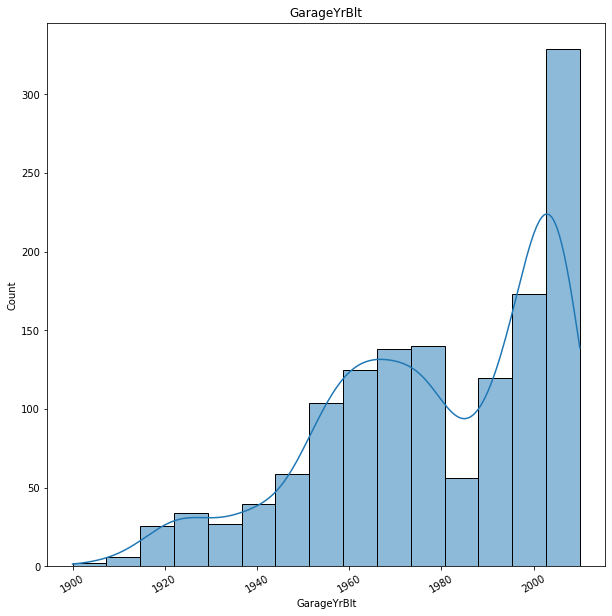

ANALYSIS FOR GarageArea

count   1460.000000
mean     472.980137
std      213.804841
min        0.000000
1%         0.000000
5%         0.000000
10%      240.000000
20%      295.600000
30%      384.000000
40%      440.000000
50%      480.000000
60%      516.000000
70%      560.000000
80%      620.200000
90%      757.100000
95%      850.100000
99%     1002.790000
max     1418.000000
Name: GarageArea, dtype: float64


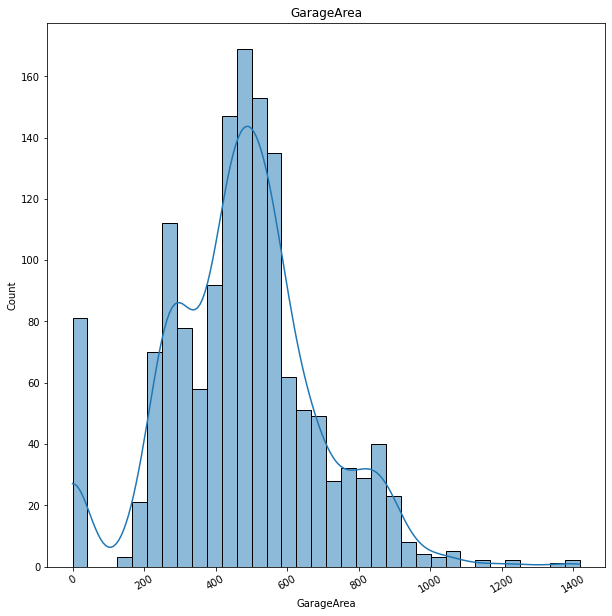

ANALYSIS FOR WoodDeckSF

count   1460.000000
mean      94.244521
std      125.338794
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%      100.000000
70%      144.000000
80%      192.000000
90%      262.000000
95%      335.000000
99%      505.460000
max      857.000000
Name: WoodDeckSF, dtype: float64


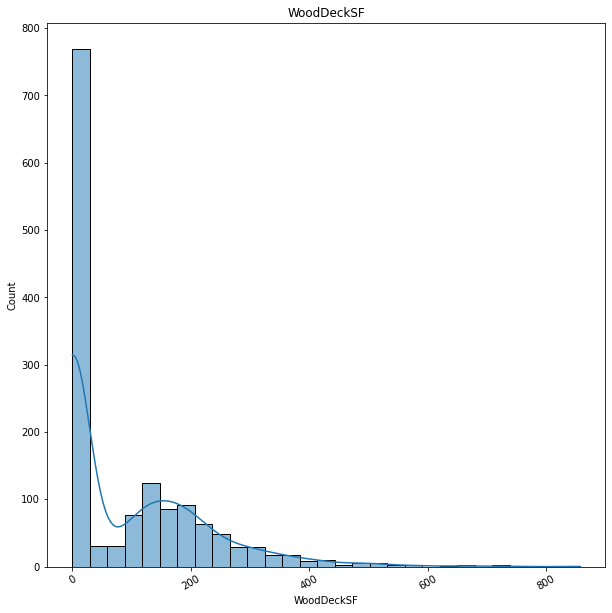

ANALYSIS FOR OpenPorchSF

count   1460.000000
mean      46.660274
std       66.256028
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%       25.000000
60%       40.000000
70%       57.000000
80%       83.200000
90%      130.000000
95%      175.050000
99%      285.820000
max      547.000000
Name: OpenPorchSF, dtype: float64


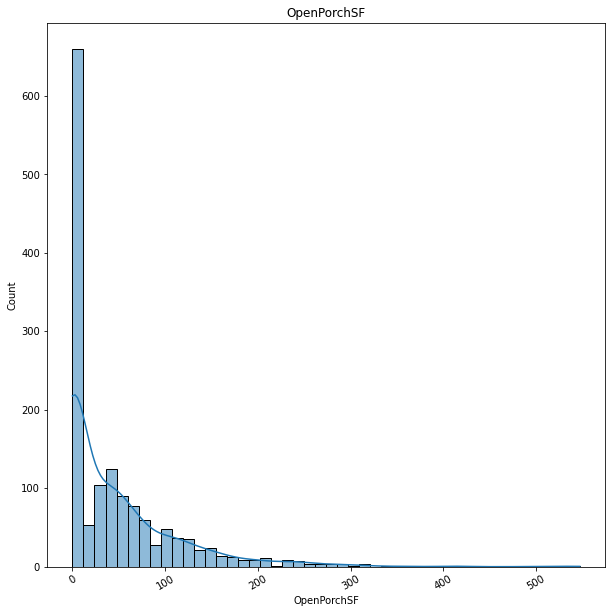

ANALYSIS FOR EnclosedPorch

count   1460.000000
mean      21.954110
std       61.119149
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        0.000000
90%      112.000000
95%      180.150000
99%      261.050000
max      552.000000
Name: EnclosedPorch, dtype: float64


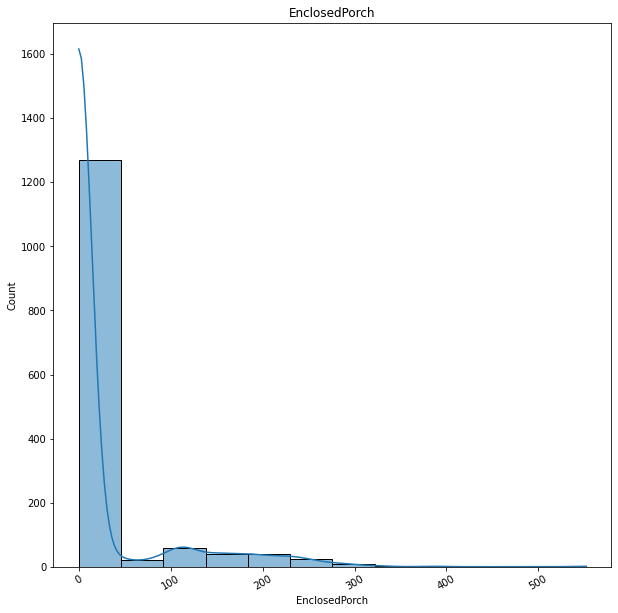

ANALYSIS FOR 3SsnPorch

count   1460.000000
mean       3.409589
std       29.317331
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        0.000000
90%        0.000000
95%        0.000000
99%      168.000000
max      508.000000
Name: 3SsnPorch, dtype: float64


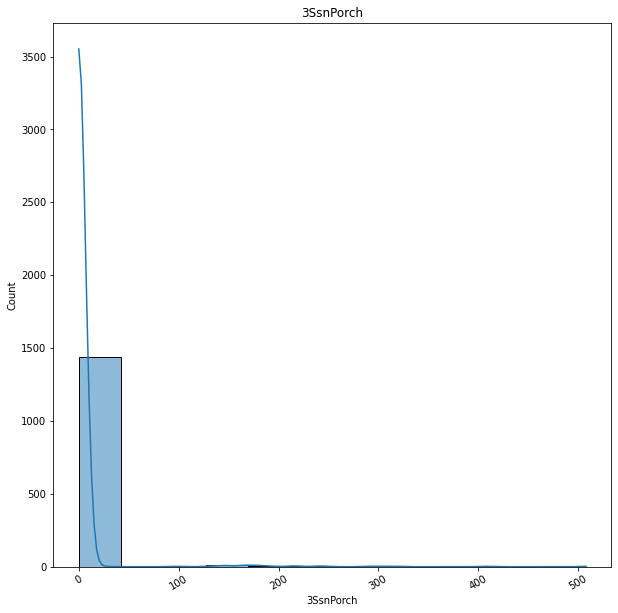

ANALYSIS FOR ScreenPorch

count   1460.000000
mean      15.060959
std       55.757415
min        0.000000
1%         0.000000
5%         0.000000
10%        0.000000
20%        0.000000
30%        0.000000
40%        0.000000
50%        0.000000
60%        0.000000
70%        0.000000
80%        0.000000
90%        0.000000
95%      160.000000
99%      268.050000
max      480.000000
Name: ScreenPorch, dtype: float64


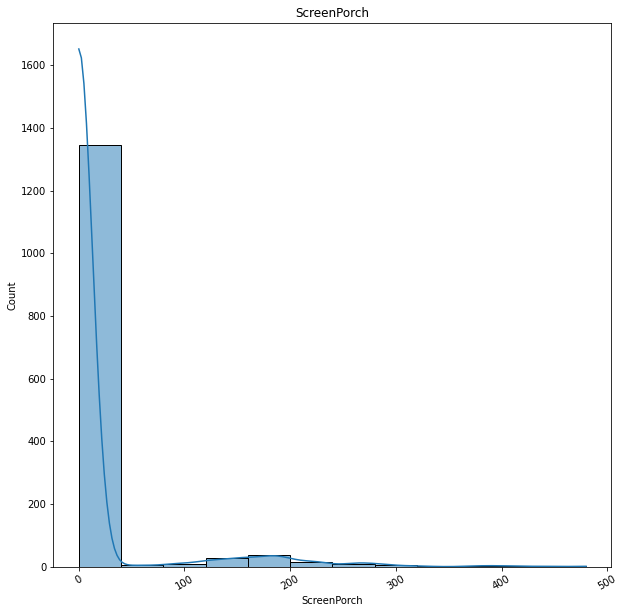

ANALYSIS FOR MiscVal

count    1460.000000
mean       43.489041
std       496.123024
min         0.000000
1%          0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       700.000000
max     15500.000000
Name: MiscVal, dtype: float64


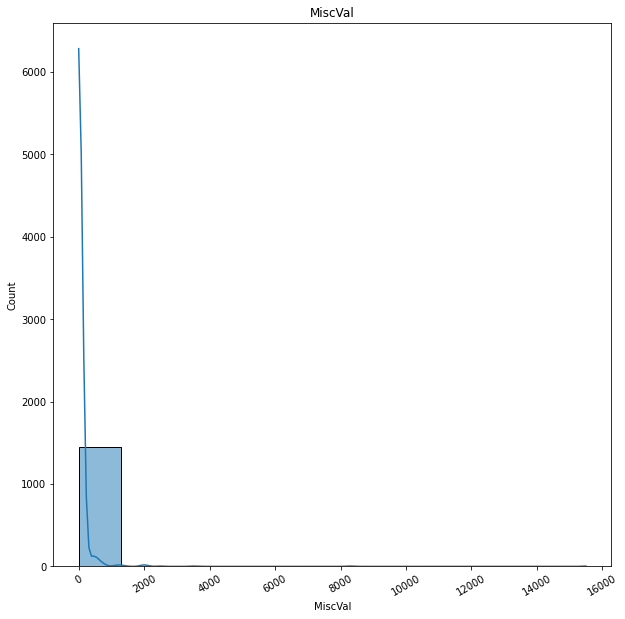

ANALYSIS FOR MoSold

count   1460.000000
mean       6.321918
std        2.703626
min        1.000000
1%         1.000000
5%         2.000000
10%        3.000000
20%        4.000000
30%        5.000000
40%        6.000000
50%        6.000000
60%        7.000000
70%        7.000000
80%        8.000000
90%       10.000000
95%       11.000000
99%       12.000000
max       12.000000
Name: MoSold, dtype: float64


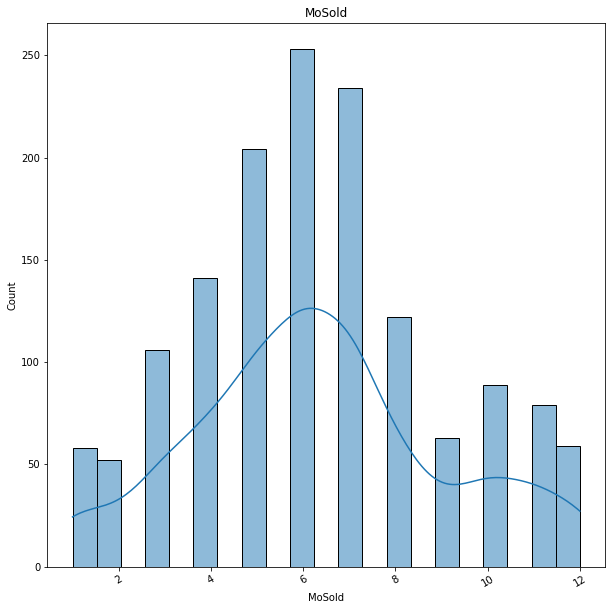

ANALYSIS FOR SalePrice

count     1460.000000
mean    180921.195890
std      79442.502883
min      34900.000000
1%       61815.970000
5%       88000.000000
10%     106475.000000
20%     124000.000000
30%     135500.000000
40%     147000.000000
50%     163000.000000
60%     179280.000000
70%     198620.000000
80%     230000.000000
90%     278000.000000
95%     326100.000000
99%     442567.010000
max     755000.000000
Name: SalePrice, dtype: float64


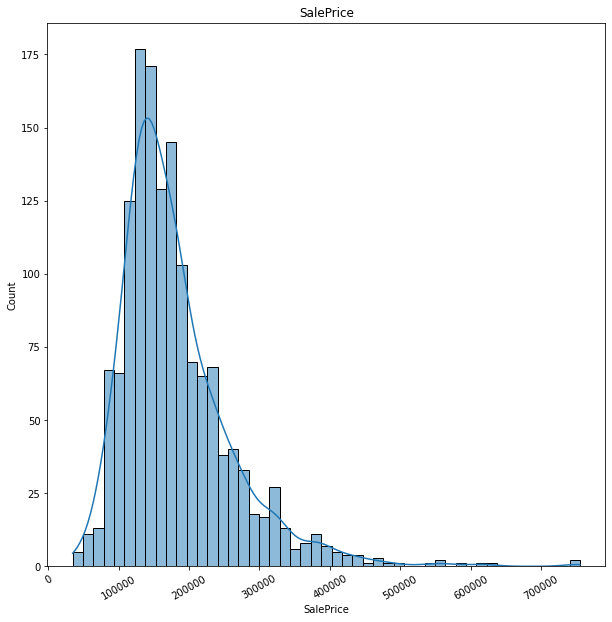

In [13]:
for col in num_col:
    numerical_analysis(df,col,plot=True)

# CATEGORICAL ANALYSIS

In [14]:
def categorical_analysis(df,col,plot=False):
    print("ANALYSIS FOR {}".format(col))
    print(pd.DataFrame({col:df[col].value_counts(),
                       "Ratio":100*df[col].value_counts()/len(df)}))
    
    
    if plot:
        plt.figure(figsize=(10,10))
        sns.countplot(x=df[col],data=df,color="red")
        plt.title(col)
        plt.xticks(rotation=30)
        plt.show(block=True)
    print("##########################")

ANALYSIS FOR MSZoning
         MSZoning     Ratio
RL           1151 78.835616
RM            218 14.931507
FV             65  4.452055
RH             16  1.095890
C (all)        10  0.684932


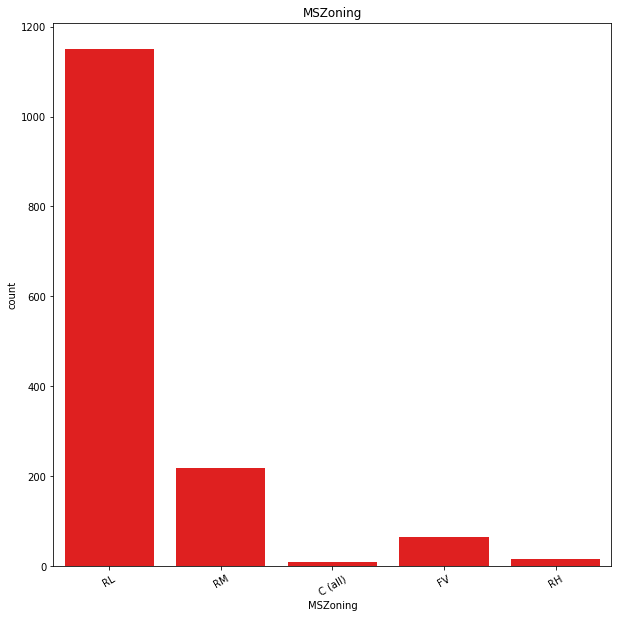

##########################
ANALYSIS FOR Street
      Street     Ratio
Pave    1454 99.589041
Grvl       6  0.410959


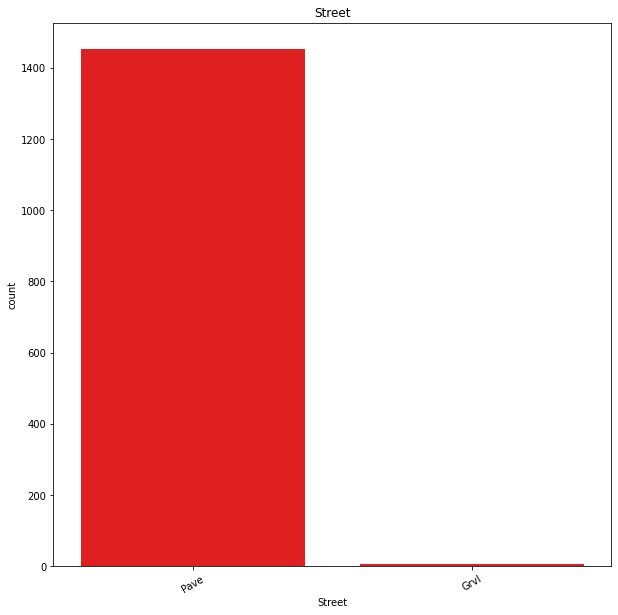

##########################
ANALYSIS FOR Alley
      Alley    Ratio
Grvl     50 3.424658
Pave     41 2.808219


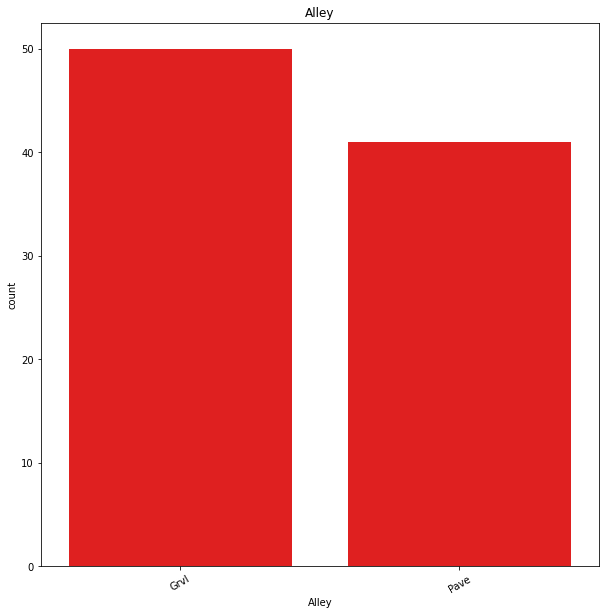

##########################
ANALYSIS FOR LotShape
     LotShape     Ratio
Reg       925 63.356164
IR1       484 33.150685
IR2        41  2.808219
IR3        10  0.684932


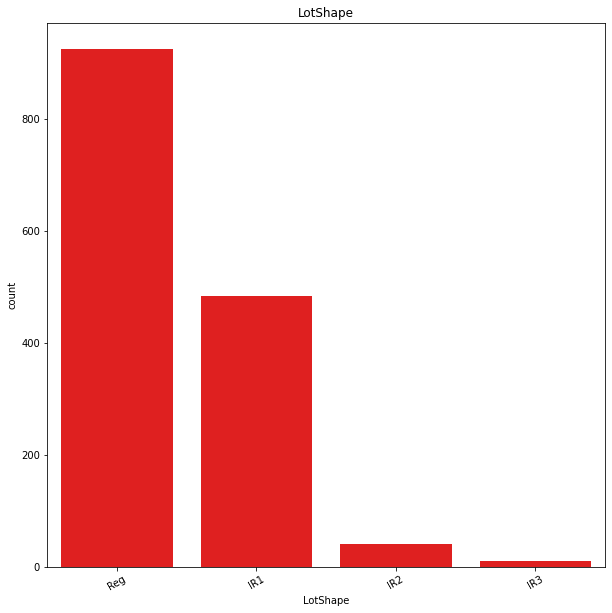

##########################
ANALYSIS FOR LandContour
     LandContour     Ratio
Lvl         1311 89.794521
Bnk           63  4.315068
HLS           50  3.424658
Low           36  2.465753


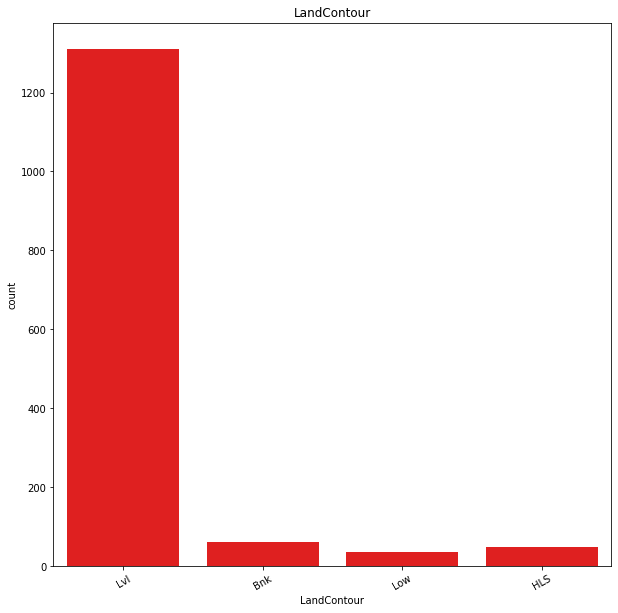

##########################
ANALYSIS FOR Utilities
        Utilities     Ratio
AllPub       1459 99.931507
NoSeWa          1  0.068493


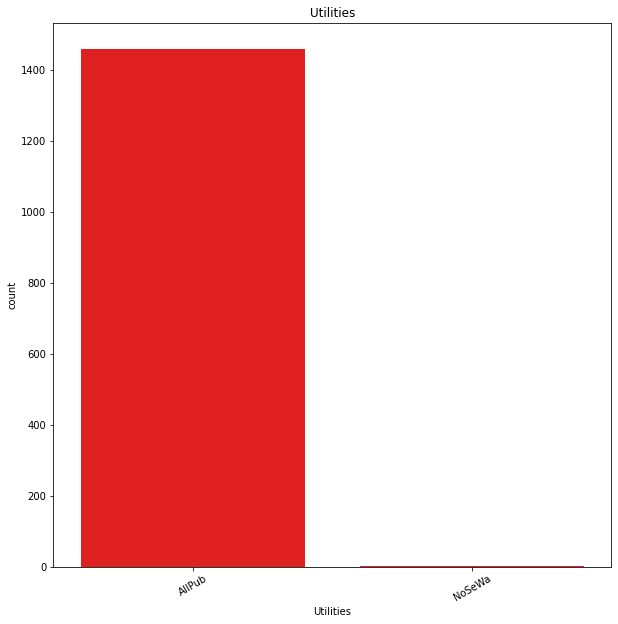

##########################
ANALYSIS FOR LotConfig
         LotConfig     Ratio
Inside        1052 72.054795
Corner         263 18.013699
CulDSac         94  6.438356
FR2             47  3.219178
FR3              4  0.273973


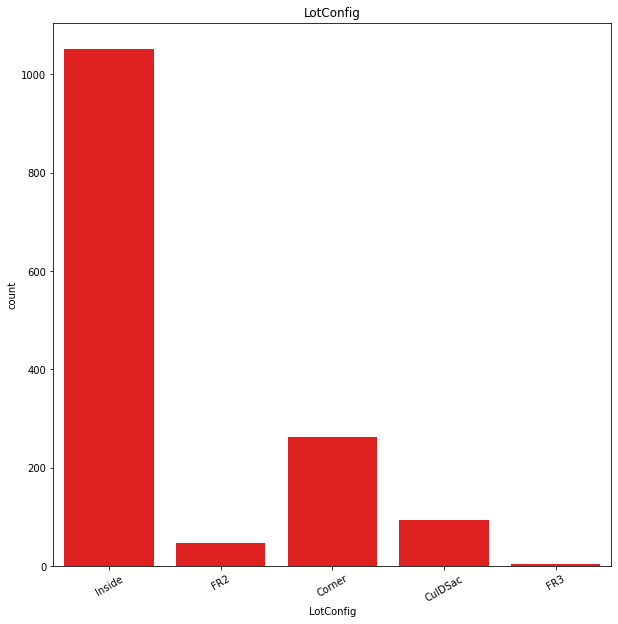

##########################
ANALYSIS FOR LandSlope
     LandSlope     Ratio
Gtl       1382 94.657534
Mod         65  4.452055
Sev         13  0.890411


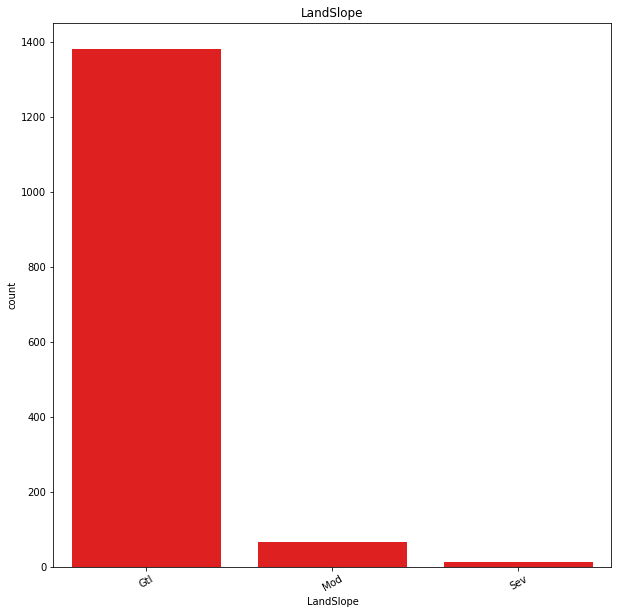

##########################
ANALYSIS FOR Neighborhood
         Neighborhood     Ratio
NAmes             225 15.410959
CollgCr           150 10.273973
OldTown           113  7.739726
Edwards           100  6.849315
Somerst            86  5.890411
Gilbert            79  5.410959
NridgHt            77  5.273973
Sawyer             74  5.068493
NWAmes             73  5.000000
SawyerW            59  4.041096
BrkSide            58  3.972603
Crawfor            51  3.493151
Mitchel            49  3.356164
NoRidge            41  2.808219
Timber             38  2.602740
IDOTRR             37  2.534247
ClearCr            28  1.917808
StoneBr            25  1.712329
SWISU              25  1.712329
MeadowV            17  1.164384
Blmngtn            17  1.164384
BrDale             16  1.095890
Veenker            11  0.753425
NPkVill             9  0.616438
Blueste             2  0.136986


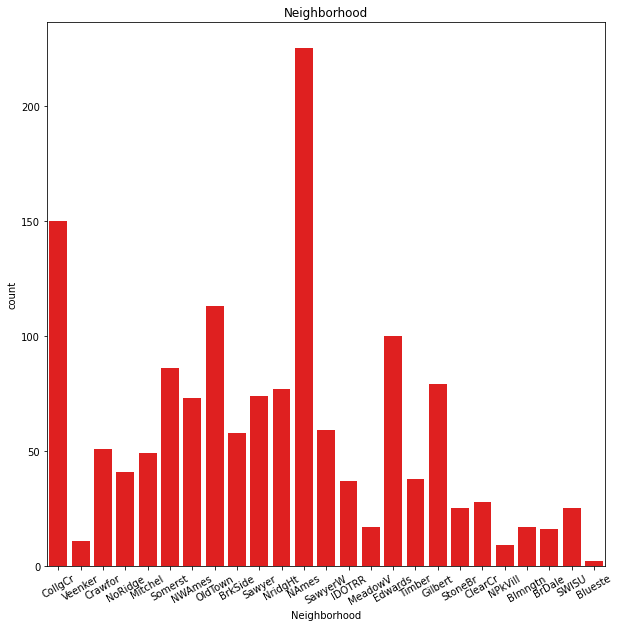

##########################
ANALYSIS FOR Condition1
        Condition1     Ratio
Norm          1260 86.301370
Feedr           81  5.547945
Artery          48  3.287671
RRAn            26  1.780822
PosN            19  1.301370
RRAe            11  0.753425
PosA             8  0.547945
RRNn             5  0.342466
RRNe             2  0.136986


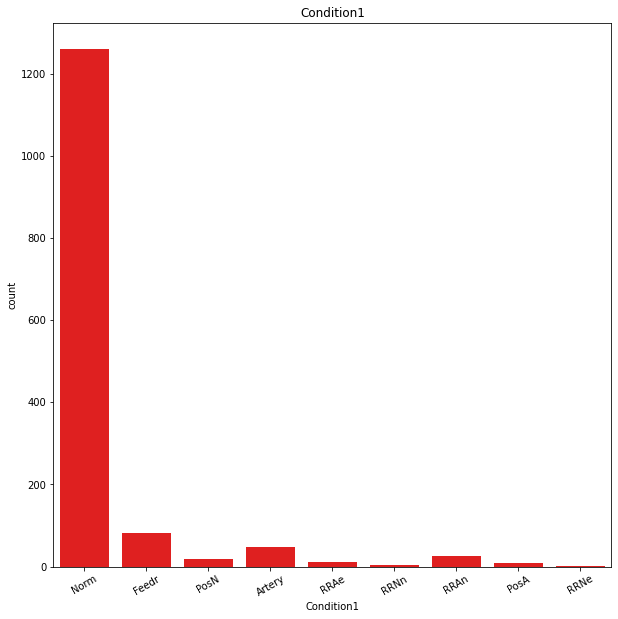

##########################
ANALYSIS FOR Condition2
        Condition2     Ratio
Norm          1445 98.972603
Feedr            6  0.410959
Artery           2  0.136986
RRNn             2  0.136986
PosN             2  0.136986
PosA             1  0.068493
RRAn             1  0.068493
RRAe             1  0.068493


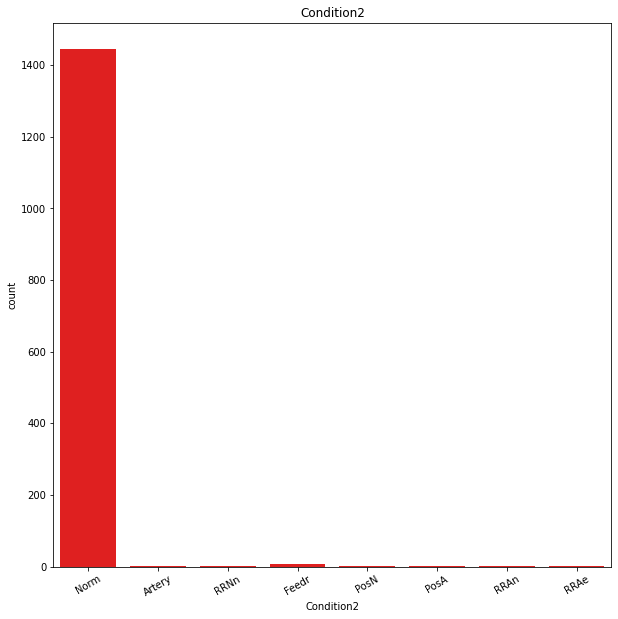

##########################
ANALYSIS FOR BldgType
        BldgType     Ratio
1Fam        1220 83.561644
TwnhsE       114  7.808219
Duplex        52  3.561644
Twnhs         43  2.945205
2fmCon        31  2.123288


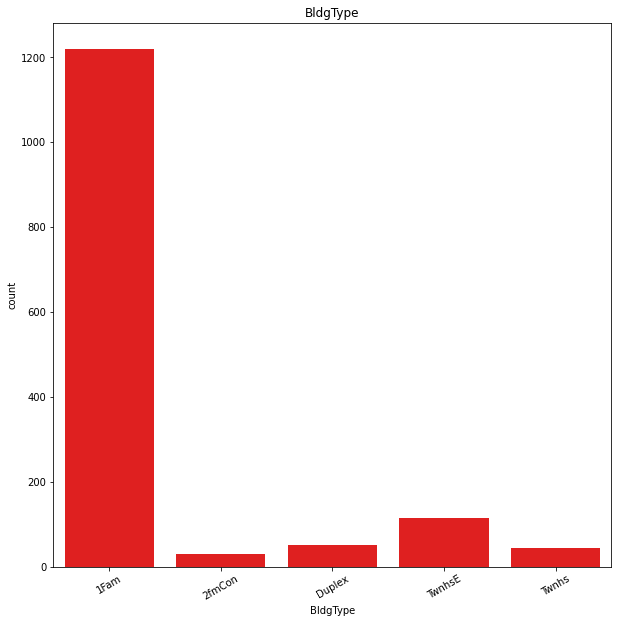

##########################
ANALYSIS FOR HouseStyle
        HouseStyle     Ratio
1Story         726 49.726027
2Story         445 30.479452
1.5Fin         154 10.547945
SLvl            65  4.452055
SFoyer          37  2.534247
1.5Unf          14  0.958904
2.5Unf          11  0.753425
2.5Fin           8  0.547945


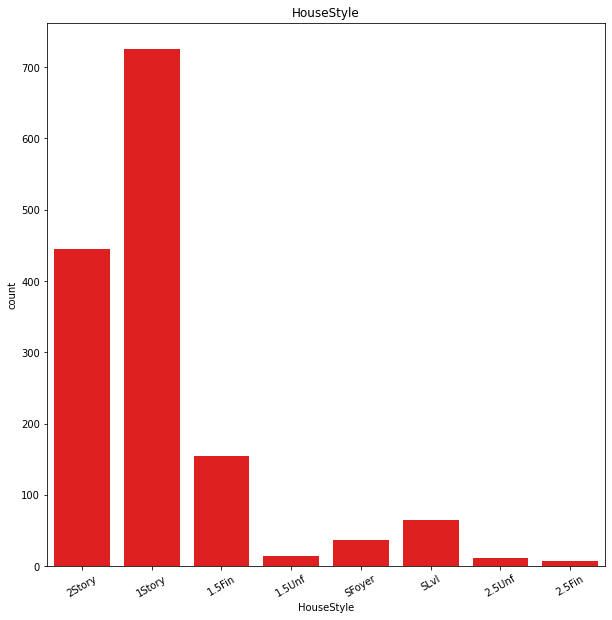

##########################
ANALYSIS FOR RoofStyle
         RoofStyle     Ratio
Gable         1141 78.150685
Hip            286 19.589041
Flat            13  0.890411
Gambrel         11  0.753425
Mansard          7  0.479452
Shed             2  0.136986


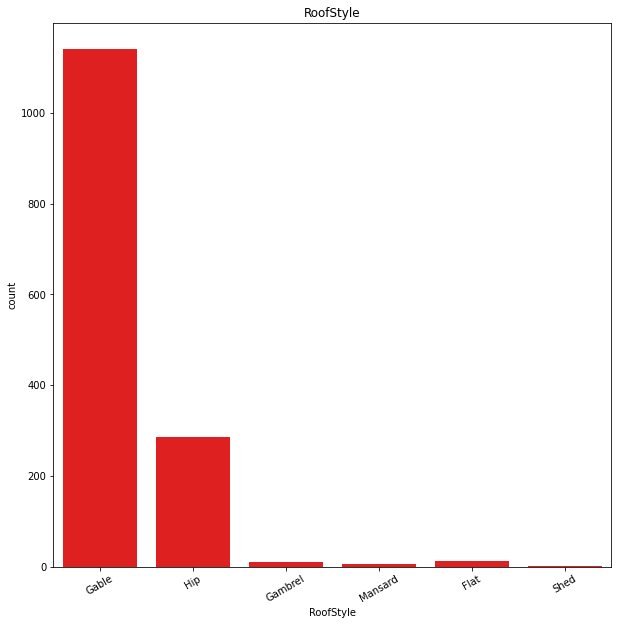

##########################
ANALYSIS FOR RoofMatl
         RoofMatl     Ratio
CompShg      1434 98.219178
Tar&Grv        11  0.753425
WdShngl         6  0.410959
WdShake         5  0.342466
Metal           1  0.068493
Membran         1  0.068493
Roll            1  0.068493
ClyTile         1  0.068493


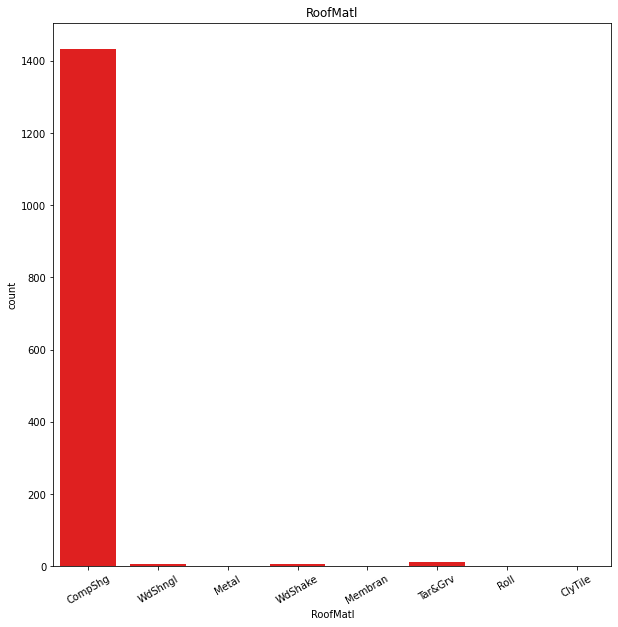

##########################
ANALYSIS FOR Exterior1st
         Exterior1st     Ratio
VinylSd          515 35.273973
HdBoard          222 15.205479
MetalSd          220 15.068493
Wd Sdng          206 14.109589
Plywood          108  7.397260
CemntBd           61  4.178082
BrkFace           50  3.424658
WdShing           26  1.780822
Stucco            25  1.712329
AsbShng           20  1.369863
BrkComm            2  0.136986
Stone              2  0.136986
AsphShn            1  0.068493
ImStucc            1  0.068493
CBlock             1  0.068493


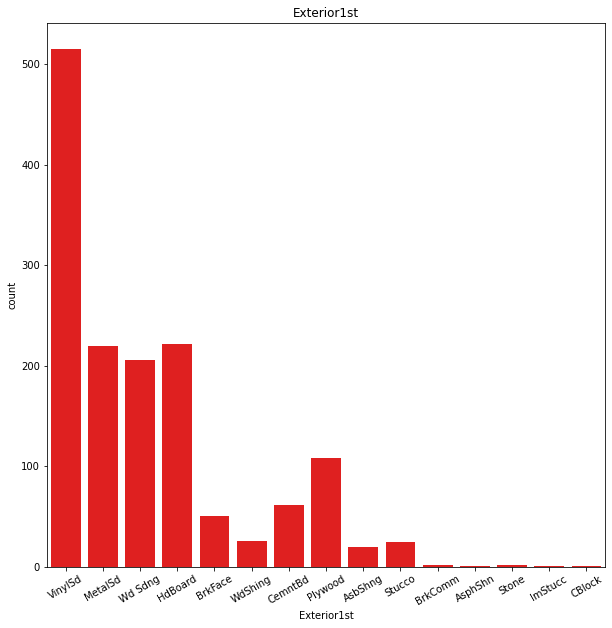

##########################
ANALYSIS FOR Exterior2nd
         Exterior2nd     Ratio
VinylSd          504 34.520548
MetalSd          214 14.657534
HdBoard          207 14.178082
Wd Sdng          197 13.493151
Plywood          142  9.726027
CmentBd           60  4.109589
Wd Shng           38  2.602740
Stucco            26  1.780822
BrkFace           25  1.712329
AsbShng           20  1.369863
ImStucc           10  0.684932
Brk Cmn            7  0.479452
Stone              5  0.342466
AsphShn            3  0.205479
Other              1  0.068493
CBlock             1  0.068493


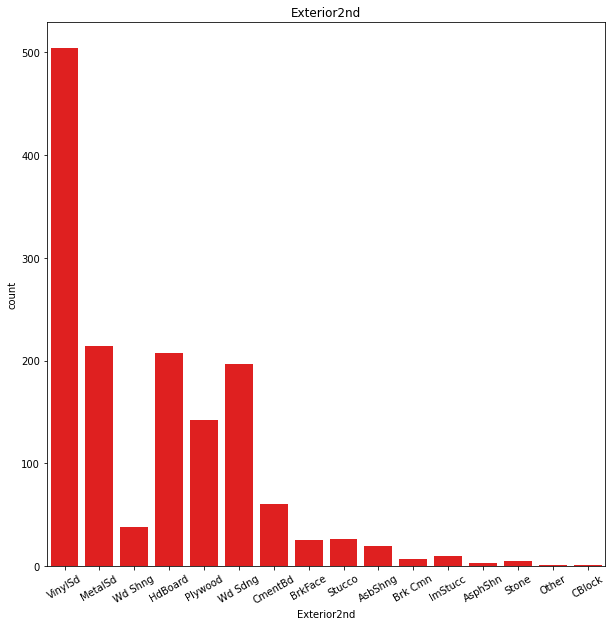

##########################
ANALYSIS FOR MasVnrType
         MasVnrType     Ratio
None            864 59.178082
BrkFace         445 30.479452
Stone           128  8.767123
BrkCmn           15  1.027397


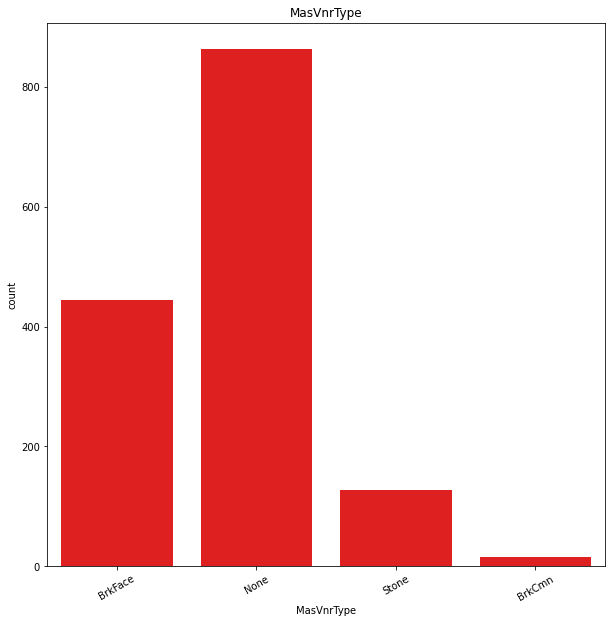

##########################
ANALYSIS FOR ExterQual
    ExterQual     Ratio
TA        906 62.054795
Gd        488 33.424658
Ex         52  3.561644
Fa         14  0.958904


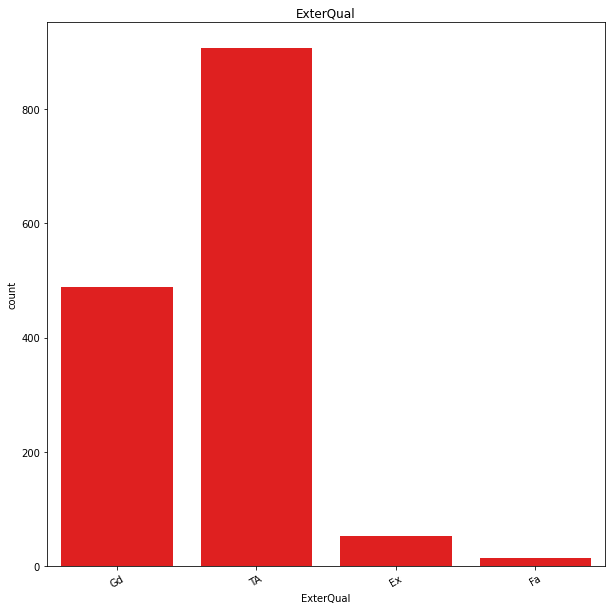

##########################
ANALYSIS FOR ExterCond
    ExterCond     Ratio
TA       1282 87.808219
Gd        146 10.000000
Fa         28  1.917808
Ex          3  0.205479
Po          1  0.068493


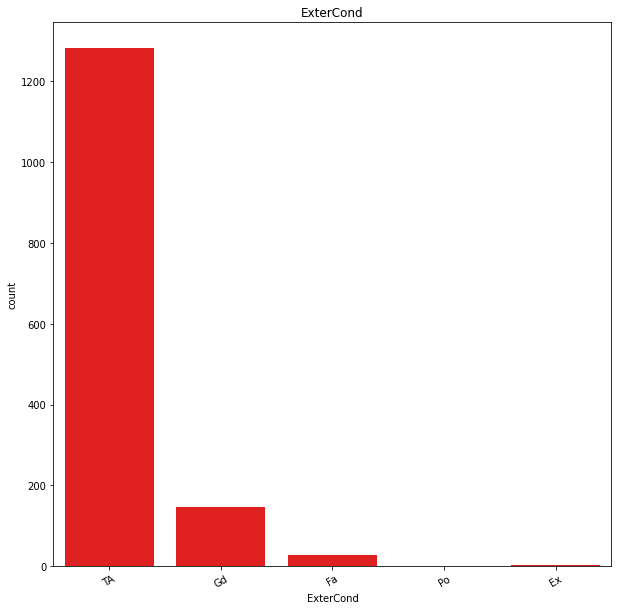

##########################
ANALYSIS FOR Foundation
        Foundation     Ratio
PConc          647 44.315068
CBlock         634 43.424658
BrkTil         146 10.000000
Slab            24  1.643836
Stone            6  0.410959
Wood             3  0.205479


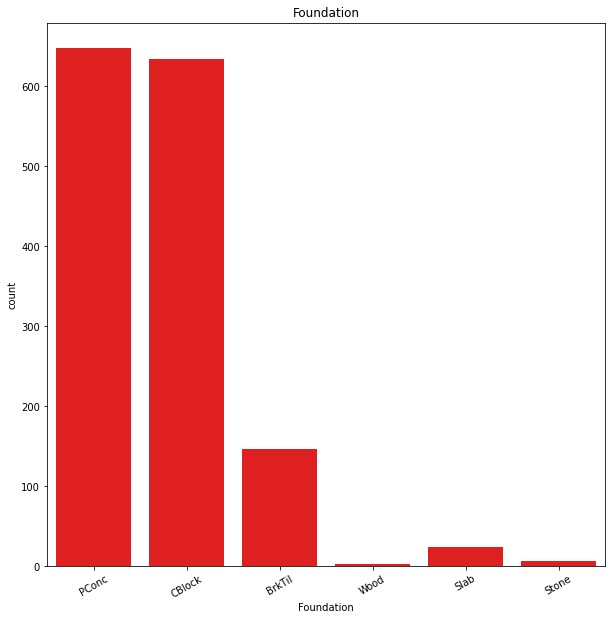

##########################
ANALYSIS FOR BsmtQual
    BsmtQual     Ratio
TA       649 44.452055
Gd       618 42.328767
Ex       121  8.287671
Fa        35  2.397260


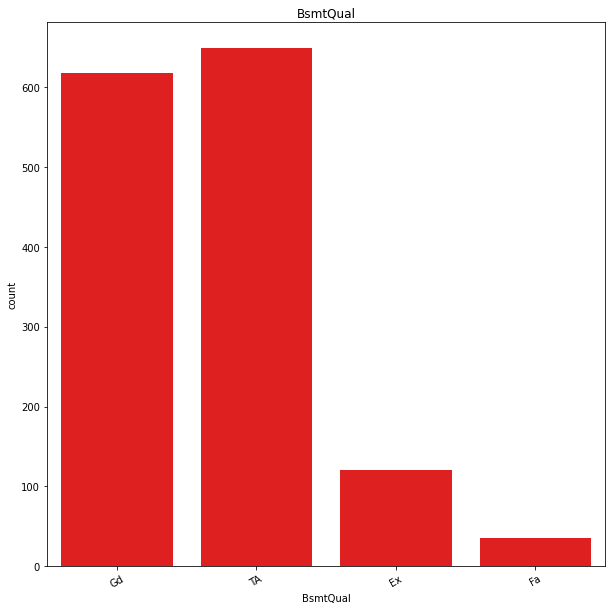

##########################
ANALYSIS FOR BsmtCond
    BsmtCond     Ratio
TA      1311 89.794521
Gd        65  4.452055
Fa        45  3.082192
Po         2  0.136986


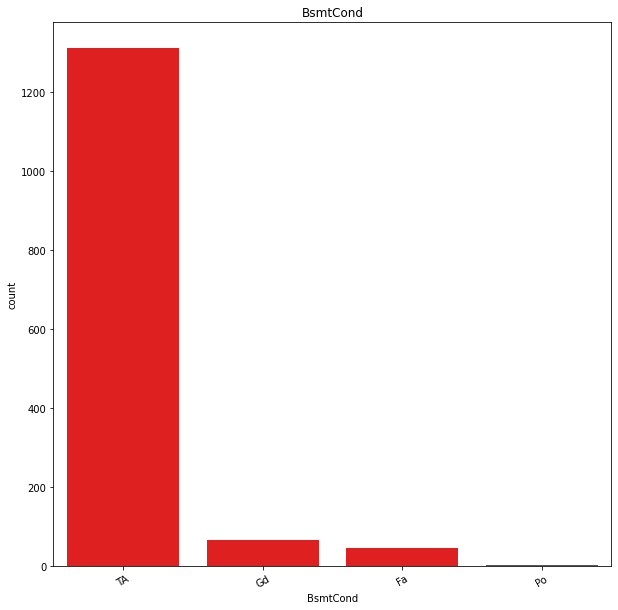

##########################
ANALYSIS FOR BsmtExposure
    BsmtExposure     Ratio
No           953 65.273973
Av           221 15.136986
Gd           134  9.178082
Mn           114  7.808219


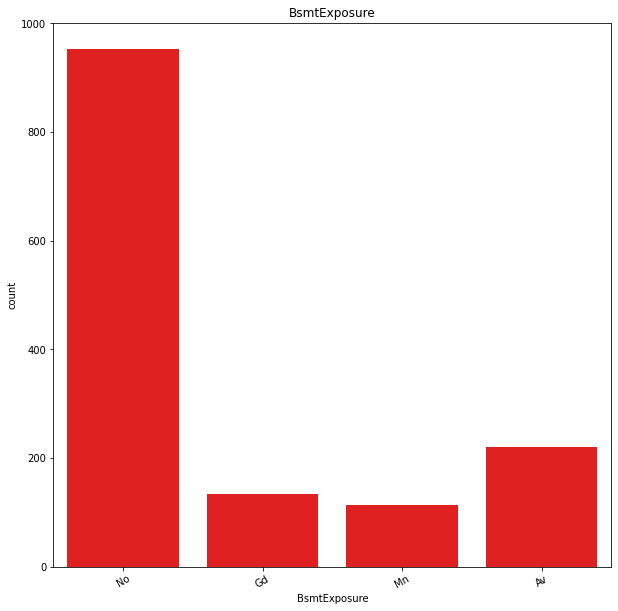

##########################
ANALYSIS FOR BsmtFinType1
     BsmtFinType1     Ratio
Unf           430 29.452055
GLQ           418 28.630137
ALQ           220 15.068493
BLQ           148 10.136986
Rec           133  9.109589
LwQ            74  5.068493


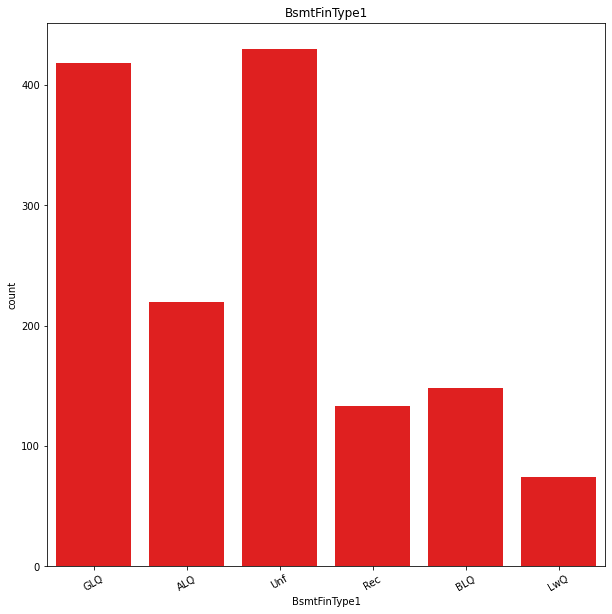

##########################
ANALYSIS FOR BsmtFinType2
     BsmtFinType2     Ratio
Unf          1256 86.027397
Rec            54  3.698630
LwQ            46  3.150685
BLQ            33  2.260274
ALQ            19  1.301370
GLQ            14  0.958904


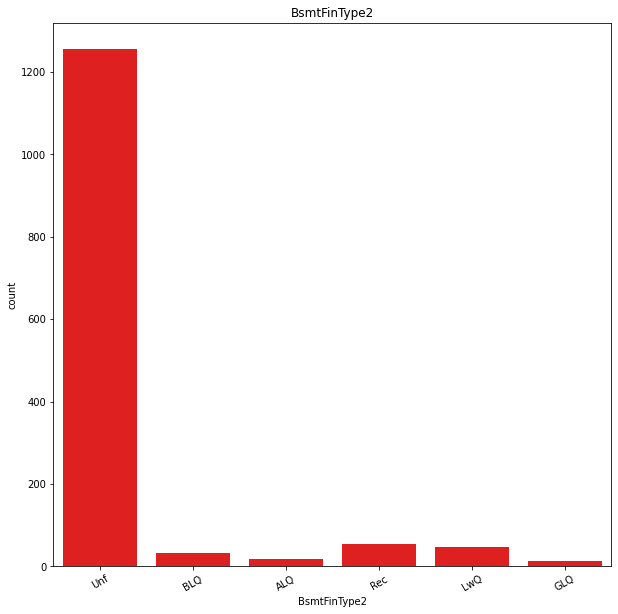

##########################
ANALYSIS FOR Heating
       Heating     Ratio
GasA      1428 97.808219
GasW        18  1.232877
Grav         7  0.479452
Wall         4  0.273973
OthW         2  0.136986
Floor        1  0.068493


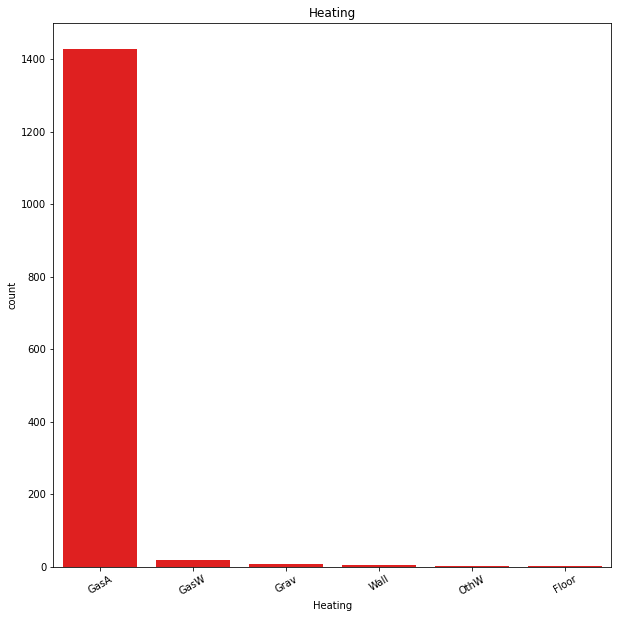

##########################
ANALYSIS FOR HeatingQC
    HeatingQC     Ratio
Ex        741 50.753425
TA        428 29.315068
Gd        241 16.506849
Fa         49  3.356164
Po          1  0.068493


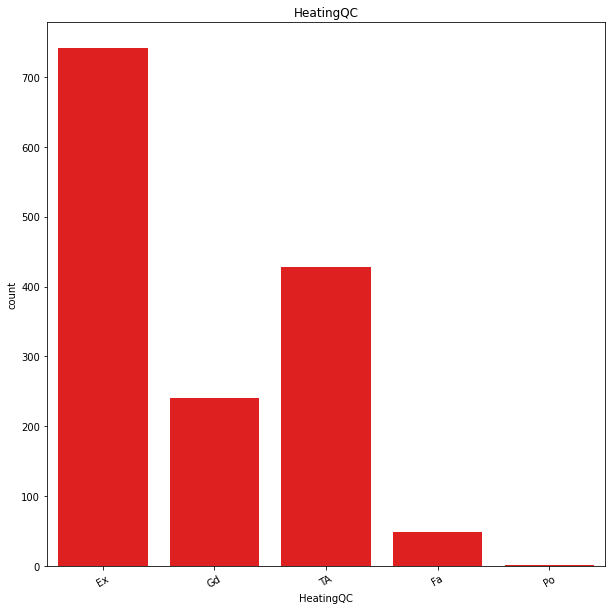

##########################
ANALYSIS FOR CentralAir
   CentralAir     Ratio
Y        1365 93.493151
N          95  6.506849


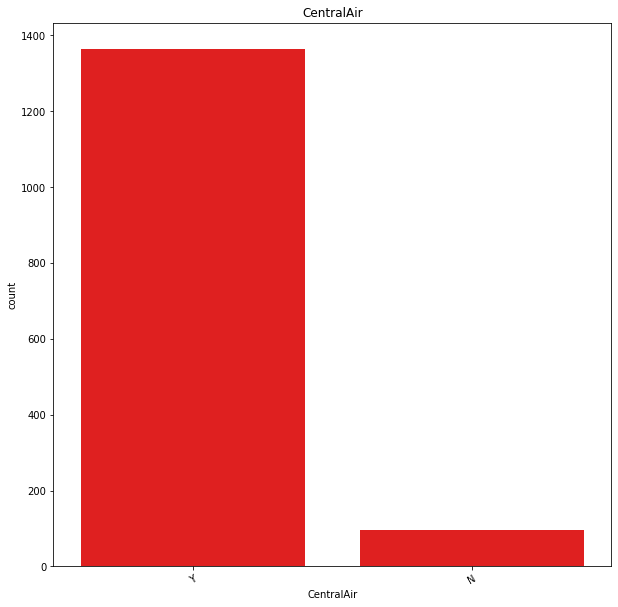

##########################
ANALYSIS FOR Electrical
       Electrical     Ratio
SBrkr        1334 91.369863
FuseA          94  6.438356
FuseF          27  1.849315
FuseP           3  0.205479
Mix             1  0.068493


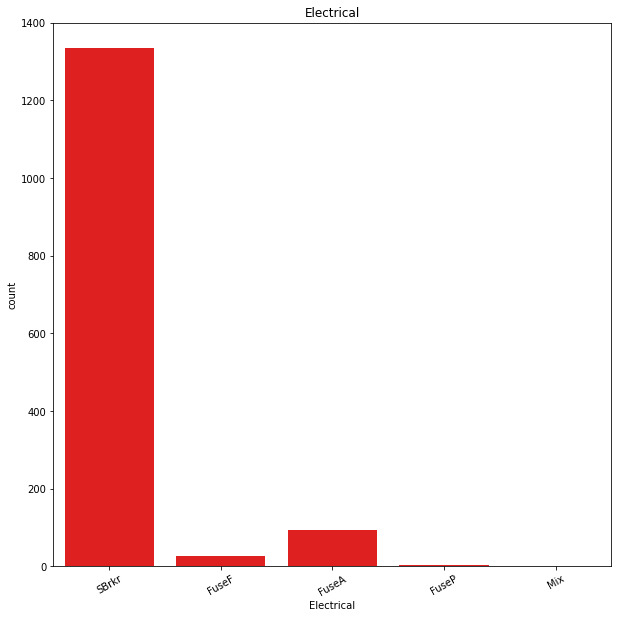

##########################
ANALYSIS FOR KitchenQual
    KitchenQual     Ratio
TA          735 50.342466
Gd          586 40.136986
Ex          100  6.849315
Fa           39  2.671233


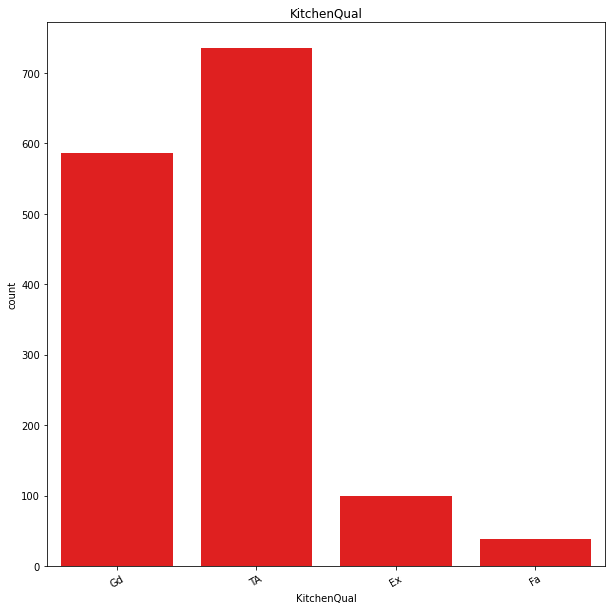

##########################
ANALYSIS FOR Functional
      Functional     Ratio
Typ         1360 93.150685
Min2          34  2.328767
Min1          31  2.123288
Mod           15  1.027397
Maj1          14  0.958904
Maj2           5  0.342466
Sev            1  0.068493


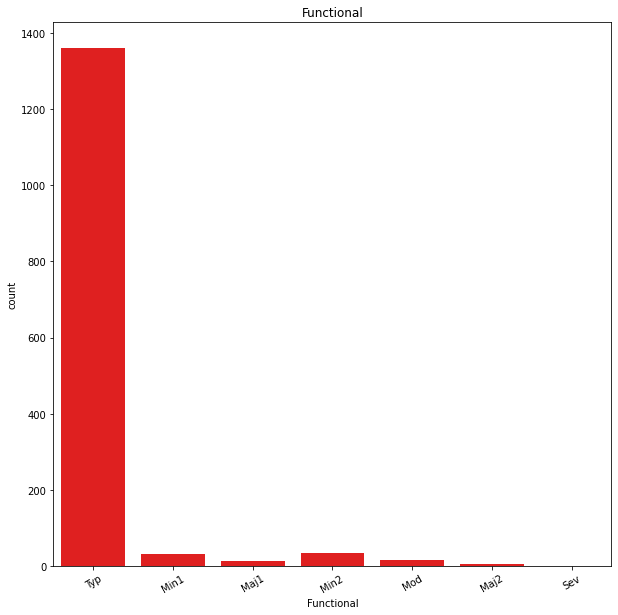

##########################
ANALYSIS FOR FireplaceQu
    FireplaceQu     Ratio
Gd          380 26.027397
TA          313 21.438356
Fa           33  2.260274
Ex           24  1.643836
Po           20  1.369863


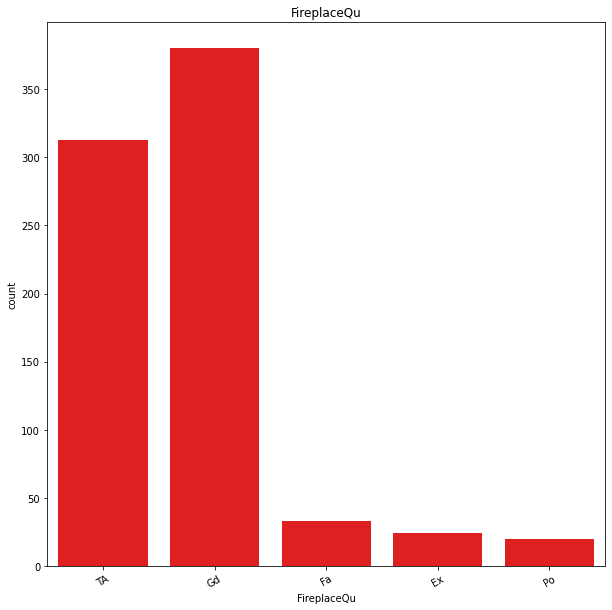

##########################
ANALYSIS FOR GarageType
         GarageType     Ratio
Attchd          870 59.589041
Detchd          387 26.506849
BuiltIn          88  6.027397
Basment          19  1.301370
CarPort           9  0.616438
2Types            6  0.410959


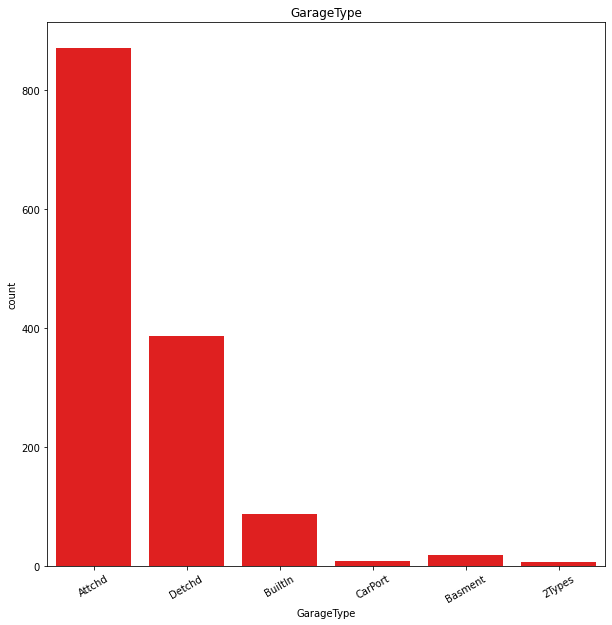

##########################
ANALYSIS FOR GarageFinish
     GarageFinish     Ratio
Unf           605 41.438356
RFn           422 28.904110
Fin           352 24.109589


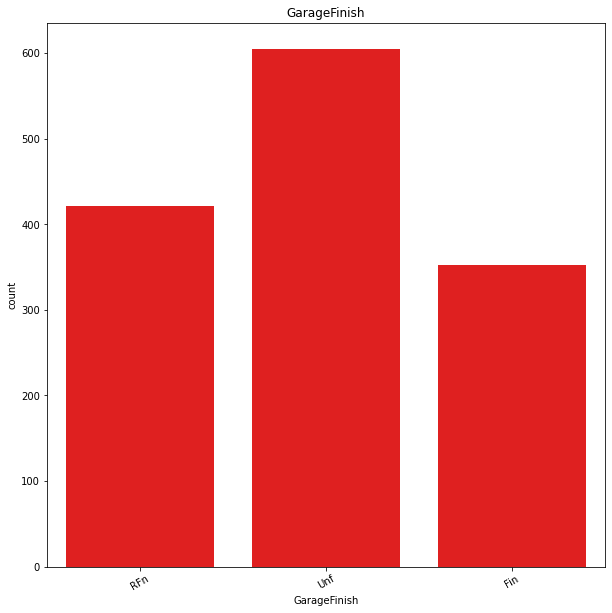

##########################
ANALYSIS FOR GarageQual
    GarageQual     Ratio
TA        1311 89.794521
Fa          48  3.287671
Gd          14  0.958904
Ex           3  0.205479
Po           3  0.205479


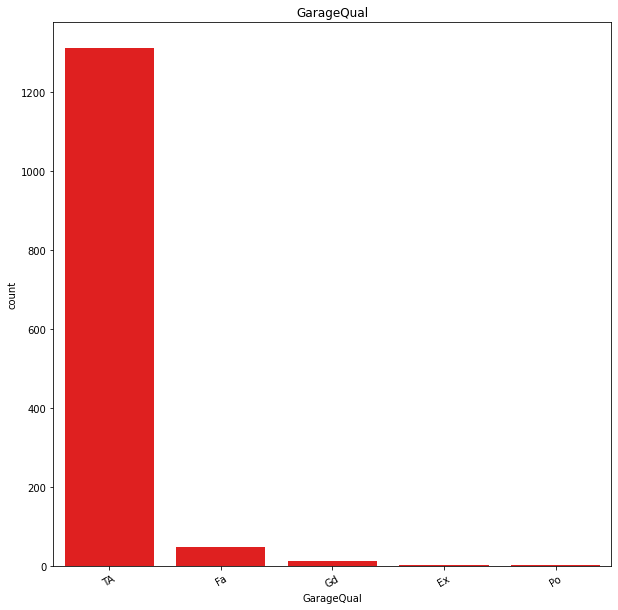

##########################
ANALYSIS FOR GarageCond
    GarageCond     Ratio
TA        1326 90.821918
Fa          35  2.397260
Gd           9  0.616438
Po           7  0.479452
Ex           2  0.136986


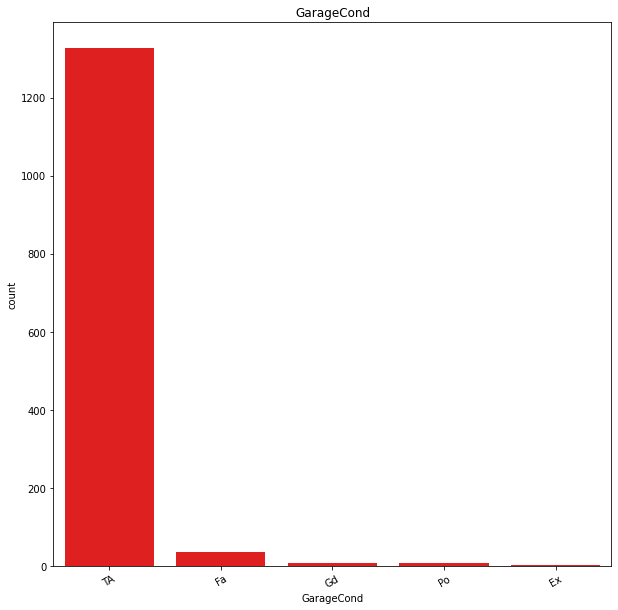

##########################
ANALYSIS FOR PavedDrive
   PavedDrive     Ratio
Y        1340 91.780822
N          90  6.164384
P          30  2.054795


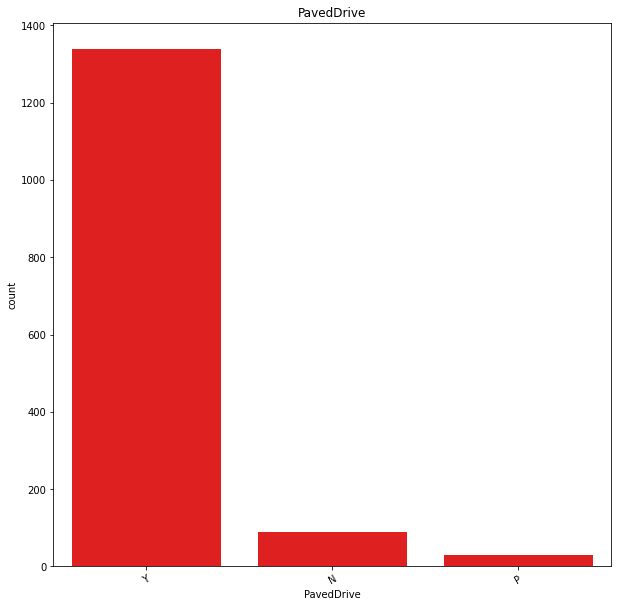

##########################
ANALYSIS FOR PoolQC
    PoolQC    Ratio
Gd       3 0.205479
Ex       2 0.136986
Fa       2 0.136986


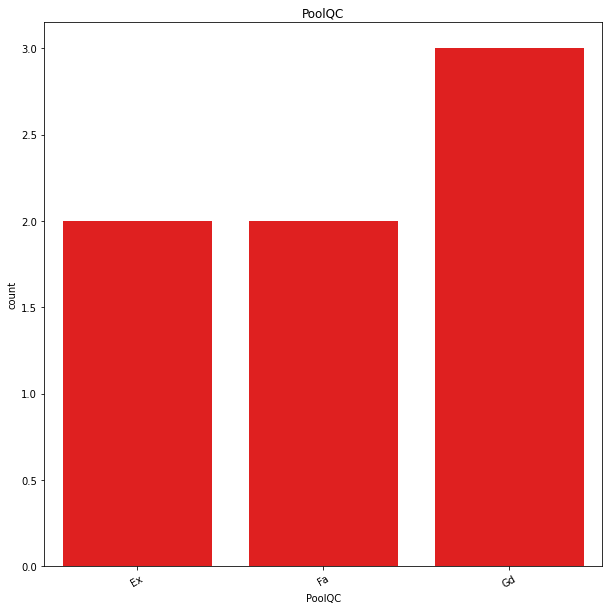

##########################
ANALYSIS FOR Fence
       Fence     Ratio
MnPrv    157 10.753425
GdPrv     59  4.041096
GdWo      54  3.698630
MnWw      11  0.753425


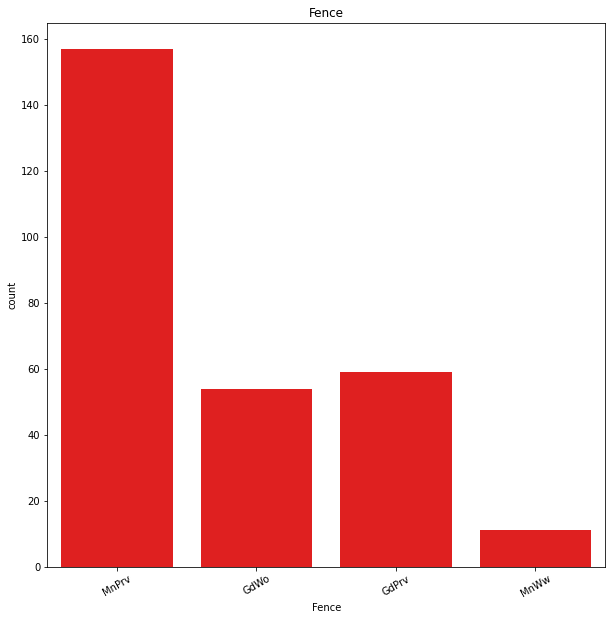

##########################
ANALYSIS FOR MiscFeature
      MiscFeature    Ratio
Shed           49 3.356164
Gar2            2 0.136986
Othr            2 0.136986
TenC            1 0.068493


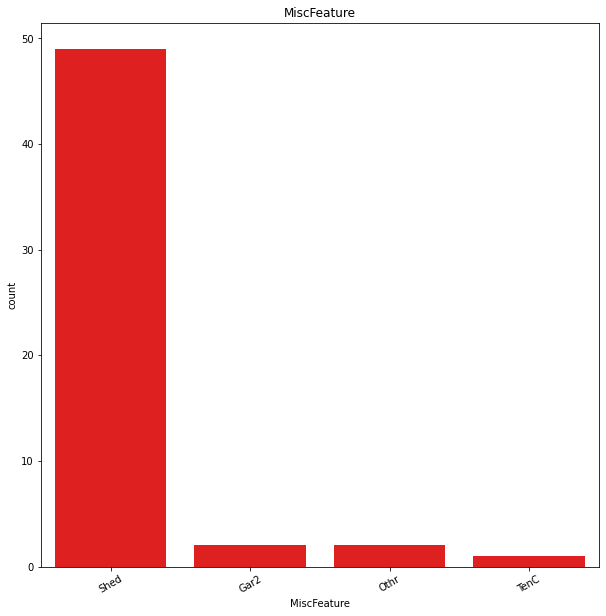

##########################
ANALYSIS FOR SaleType
       SaleType     Ratio
WD         1267 86.780822
New         122  8.356164
COD          43  2.945205
ConLD         9  0.616438
ConLI         5  0.342466
ConLw         5  0.342466
CWD           4  0.273973
Oth           3  0.205479
Con           2  0.136986


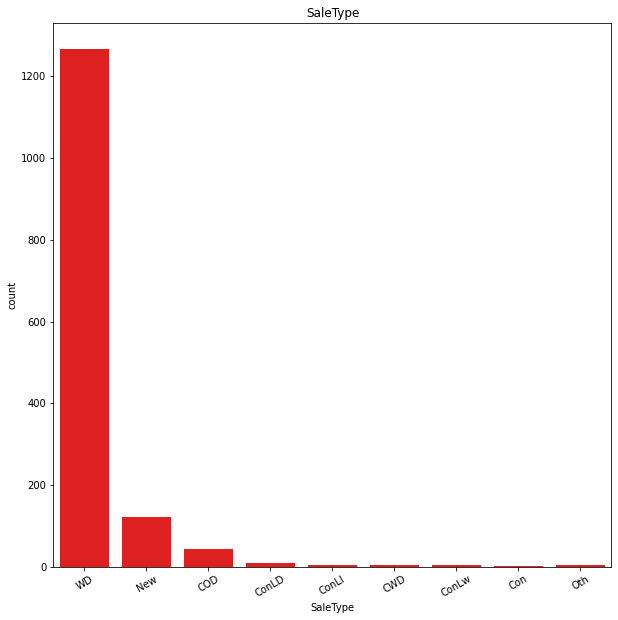

##########################
ANALYSIS FOR SaleCondition
         SaleCondition     Ratio
Normal            1198 82.054795
Partial            125  8.561644
Abnorml            101  6.917808
Family              20  1.369863
Alloca              12  0.821918
AdjLand              4  0.273973


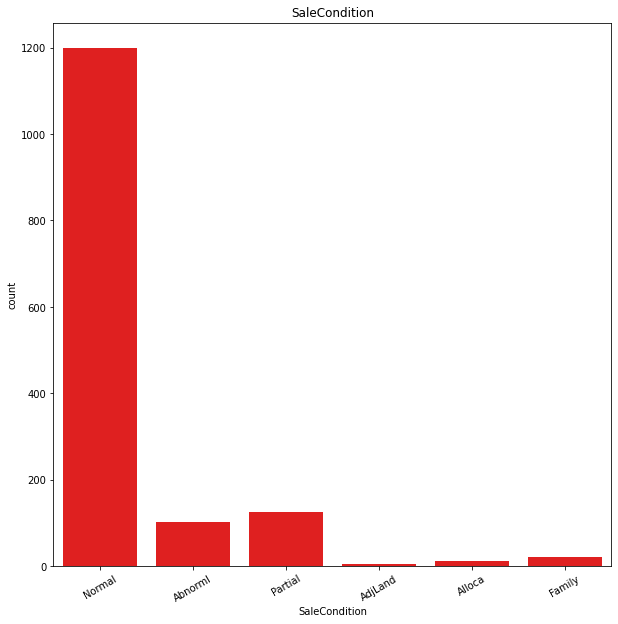

##########################
ANALYSIS FOR OverallCond
   OverallCond     Ratio
5          821 56.232877
6          252 17.260274
7          205 14.041096
8           72  4.931507
4           57  3.904110
3           25  1.712329
9           22  1.506849
2            5  0.342466
1            1  0.068493


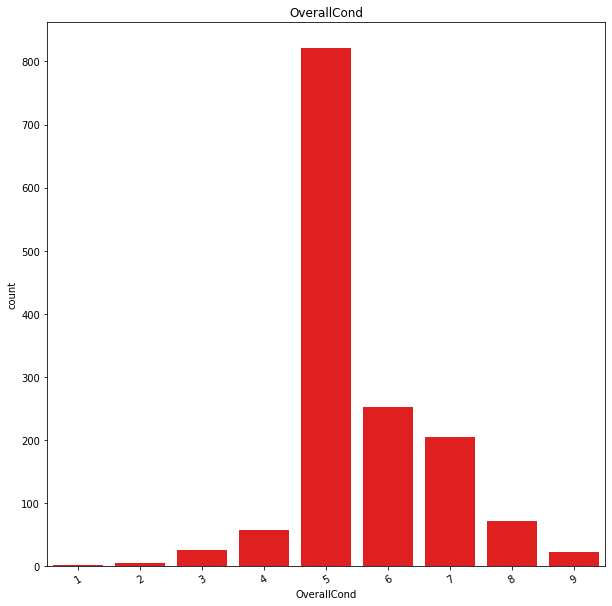

##########################
ANALYSIS FOR BsmtFullBath
   BsmtFullBath     Ratio
0           856 58.630137
1           588 40.273973
2            15  1.027397
3             1  0.068493


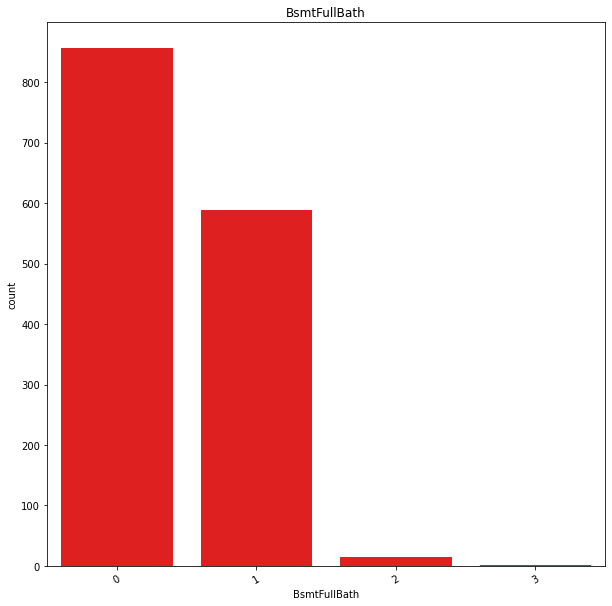

##########################
ANALYSIS FOR BsmtHalfBath
   BsmtHalfBath     Ratio
0          1378 94.383562
1            80  5.479452
2             2  0.136986


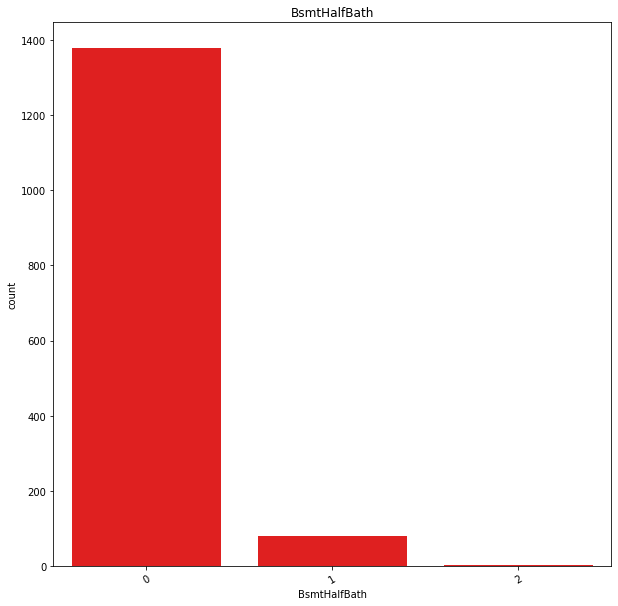

##########################
ANALYSIS FOR FullBath
   FullBath     Ratio
2       768 52.602740
1       650 44.520548
3        33  2.260274
0         9  0.616438


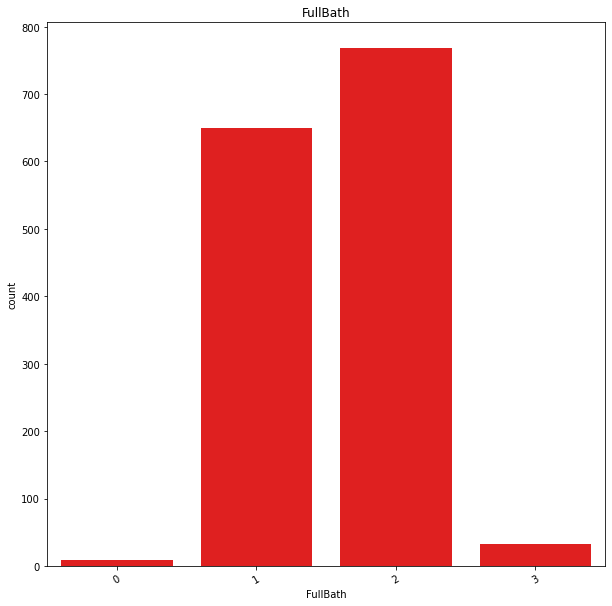

##########################
ANALYSIS FOR HalfBath
   HalfBath     Ratio
0       913 62.534247
1       535 36.643836
2        12  0.821918


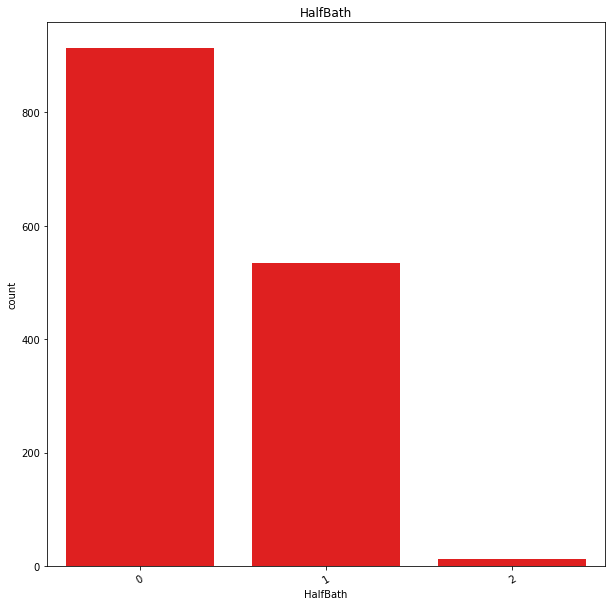

##########################
ANALYSIS FOR BedroomAbvGr
   BedroomAbvGr     Ratio
3           804 55.068493
2           358 24.520548
4           213 14.589041
1            50  3.424658
5            21  1.438356
6             7  0.479452
0             6  0.410959
8             1  0.068493


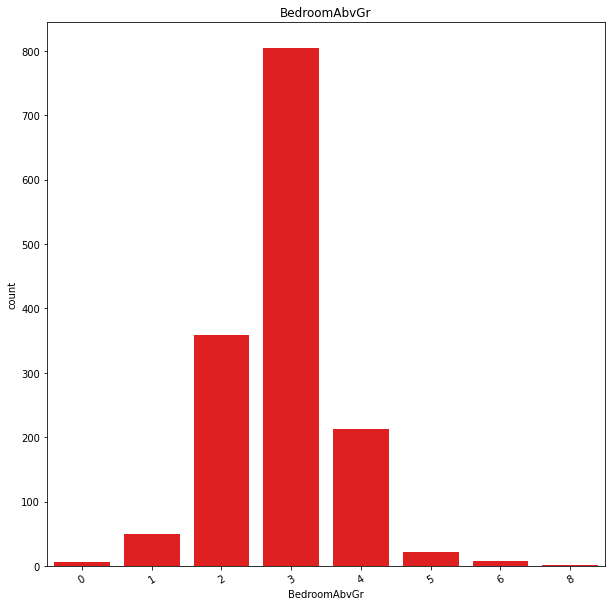

##########################
ANALYSIS FOR KitchenAbvGr
   KitchenAbvGr     Ratio
1          1392 95.342466
2            65  4.452055
3             2  0.136986
0             1  0.068493


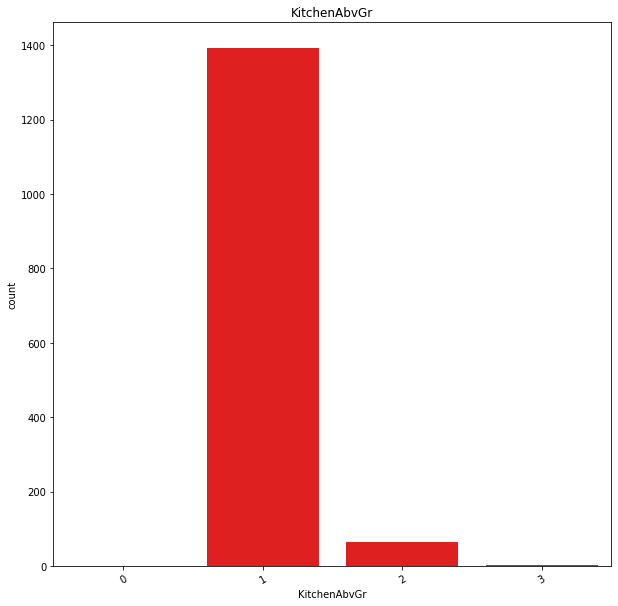

##########################
ANALYSIS FOR Fireplaces
   Fireplaces     Ratio
0         690 47.260274
1         650 44.520548
2         115  7.876712
3           5  0.342466


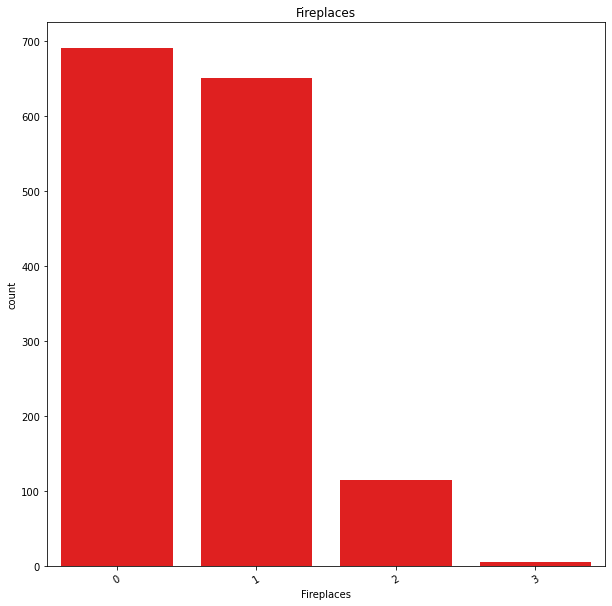

##########################
ANALYSIS FOR GarageCars
   GarageCars     Ratio
2         824 56.438356
1         369 25.273973
3         181 12.397260
0          81  5.547945
4           5  0.342466


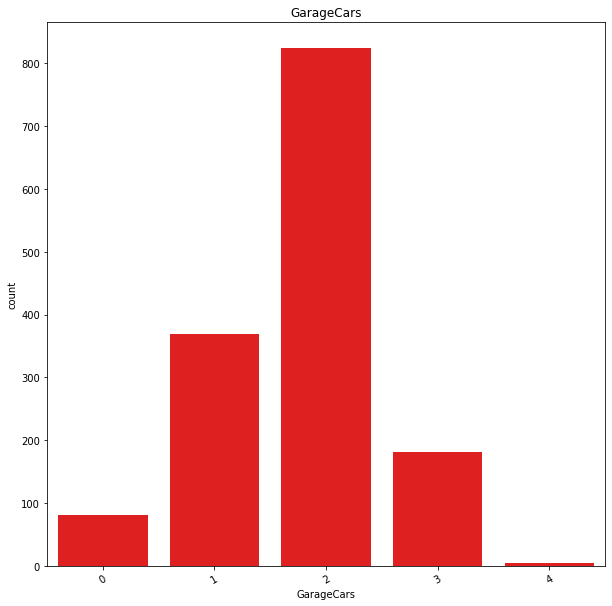

##########################
ANALYSIS FOR PoolArea
     PoolArea     Ratio
0        1453 99.520548
512         1  0.068493
648         1  0.068493
576         1  0.068493
555         1  0.068493
480         1  0.068493
519         1  0.068493
738         1  0.068493


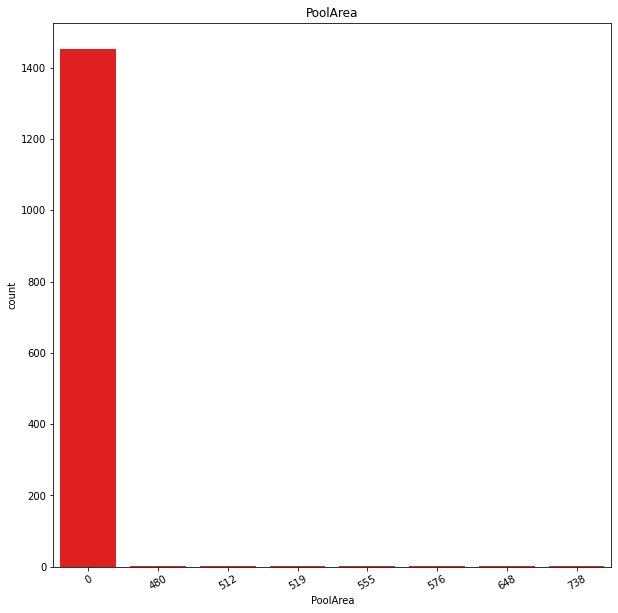

##########################
ANALYSIS FOR YrSold
      YrSold     Ratio
2009     338 23.150685
2007     329 22.534247
2006     314 21.506849
2008     304 20.821918
2010     175 11.986301


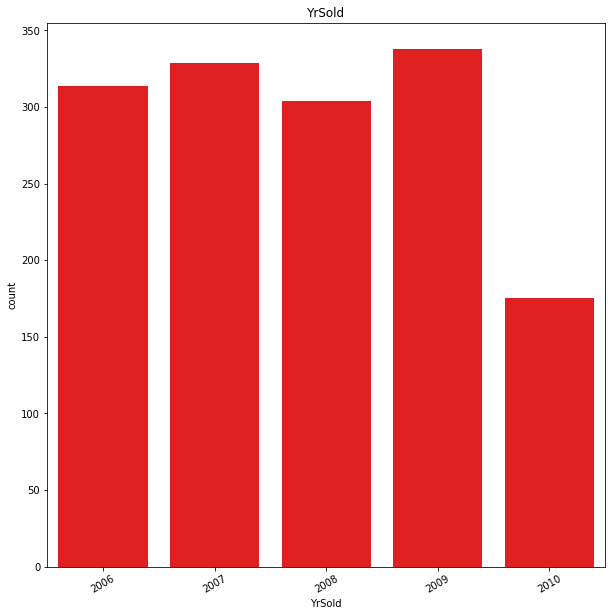

##########################


In [15]:
for col in cat_col:
    categorical_analysis(df,col,plot=True)

# OUTLIER THRESHOLDS

In [16]:
def outlier_thresholds(df,col,qu1=0.25,qu3=0.75):
    q1 = df[col].quantile(qu1)
    q3 = df[col].quantile(qu3)
    
    ıqr = q3 - q1
    
    low = q1 - 1.5*ıqr
    up = q3 + 1.5*ıqr
    
    return low,up

In [17]:
def outlier_check(df,col,qu1=0.25,qu3=0.75):
    low,up = outlier_thresholds(df,col,qu1,qu3)
    if df[(df[col] < low) | (df[col] > up)].any(axis = None):
        return True
    else:
        return False

In [18]:
for col in num_col:
    print(col,"\n",outlier_check(df,col,qu1=0.01,qu3=0.99),"\n",outlier_thresholds(df,col,qu1=0.01,qu3=0.99),"\n##############")

MSSubClass 
 False 
 (-235.0, 445.0) 
##############
LotFrontage 
 False 
 (-159.0, 321.0) 
##############
LotArea 
 True 
 (-52151.46000000031, 91399.10000000053) 
##############
OverallQual 
 False 
 (-7.5, 20.5) 
##############
YearBuilt 
 False 
 (1734.4500000000003, 2173.73) 
##############
YearRemodAdd 
 False 
 (1861.5, 2097.5) 
##############
MasVnrArea 
 False 
 (-1187.88, 1979.8000000000002) 
##############
BsmtFinSF1 
 True 
 (-2358.6150000000002, 3931.0250000000005) 
##############
BsmtFinSF2 
 False 
 (-1245.5700000000022, 2075.9500000000035) 
##############
BsmtUnfSF 
 False 
 (-2695.5750000000007, 4492.625000000001) 
##############
TotalBsmtSF 
 True 
 (-3232.5750000000003, 5387.625) 
##############
1stFlrSF 
 False 
 (-2029.1900000000005, 4768.6500000000015) 
##############
2ndFlrSF 
 False 
 (-2128.3800000000015, 3547.3000000000025) 
##############
LowQualFinSF 
 False 
 (-540.0, 900.0) 
##############
GrLivArea 
 False 
 (-2954.7700000000036, 6770.430000000006) 
#####

# FILLING OUTLIERS WITH THRESHOLDS VALUES

In [19]:
def fill_thresholds(df,col,qu1=0.25,qu3=0.75):
    low,up = outlier_thresholds(df,col,qu1,qu3)
    df[df[col] < low] = low
    df[df[col] > up] = up
    
    return df

In [20]:
#SalesPrice is target value so we take it out
num_col = [col for col in num_col if col != "SalesPrice"]
for col in num_col:
    df = fill_thresholds(df,col,qu1=0.01,qu3=0.99)

In [21]:
for col in num_col:
    print(col,outlier_check(df,col,qu1=0.01,qu3=0.99))

MSSubClass False
LotFrontage False
LotArea False
OverallQual True
YearBuilt True
YearRemodAdd True
MasVnrArea False
BsmtFinSF1 False
BsmtFinSF2 False
BsmtUnfSF False
TotalBsmtSF False
1stFlrSF False
2ndFlrSF False
LowQualFinSF False
GrLivArea False
TotRmsAbvGrd True
GarageYrBlt True
GarageArea False
WoodDeckSF False
OpenPorchSF False
EnclosedPorch False
3SsnPorch False
ScreenPorch False
MiscVal False
MoSold False
SalePrice False


### We haven`t outlier values now

# NAN VALUES

In [22]:
df.isnull().sum().sort_values(ascending=False)

PoolQC         1441
MiscFeature    1402
Alley          1355
Fence          1169
FireplaceQu     687
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

### We need to do column specific analysis when doing null analysis. Because for example house hasn`t a pool so the null value for poolQC 

In [23]:
nan_columns = {col:df[col].isnull().sum() for col in df.columns if df[col].isnull().sum()>0}

In [24]:
nan_columns

{'LotFrontage': 253,
 'Alley': 1355,
 'MasVnrType': 8,
 'MasVnrArea': 8,
 'BsmtQual': 36,
 'BsmtCond': 36,
 'BsmtExposure': 37,
 'BsmtFinType1': 36,
 'BsmtFinType2': 37,
 'Electrical': 1,
 'FireplaceQu': 687,
 'GarageType': 80,
 'GarageYrBlt': 80,
 'GarageFinish': 80,
 'GarageQual': 80,
 'GarageCond': 80,
 'PoolQC': 1441,
 'Fence': 1169,
 'MiscFeature': 1402}

In [25]:
for col in nan_columns:
    print(pd.DataFrame({col:df[col].unique()}))
    print("#################################")

     LotFrontage
0      65.000000
1      80.000000
2      68.000000
3      60.000000
4      84.000000
..           ...
106   160.000000
107   152.000000
108   124.000000
109   153.000000
110    46.000000

[111 rows x 1 columns]
#################################
      Alley
0       NaN
1      Grvl
2      Pave
3 28.500000
#################################
  MasVnrType
0    BrkFace
1       None
2      Stone
3     BrkCmn
4  28.500000
5        NaN
#################################
     MasVnrArea
0    196.000000
1      0.000000
2    162.000000
3    350.000000
4    186.000000
..          ...
322  426.000000
323   96.000000
324  438.000000
325  194.000000
326  119.000000

[327 rows x 1 columns]
#################################
   BsmtQual
0        Gd
1        TA
2        Ex
3       NaN
4        Fa
5 28.500000
#################################
   BsmtCond
0        TA
1        Gd
2       NaN
3        Fa
4 28.500000
5        Po
#################################
  BsmtExposure
0           No
1  

In [26]:
for col in nan_columns:
    print(pd.DataFrame({col:df[col].unique()}))
    print("#################################")

     LotFrontage
0      65.000000
1      80.000000
2      68.000000
3      60.000000
4      84.000000
..           ...
106   160.000000
107   152.000000
108   124.000000
109   153.000000
110    46.000000

[111 rows x 1 columns]
#################################
      Alley
0       NaN
1      Grvl
2      Pave
3 28.500000
#################################
  MasVnrType
0    BrkFace
1       None
2      Stone
3     BrkCmn
4  28.500000
5        NaN
#################################
     MasVnrArea
0    196.000000
1      0.000000
2    162.000000
3    350.000000
4    186.000000
..          ...
322  426.000000
323   96.000000
324  438.000000
325  194.000000
326  119.000000

[327 rows x 1 columns]
#################################
   BsmtQual
0        Gd
1        TA
2        Ex
3       NaN
4        Fa
5 28.500000
#################################
   BsmtCond
0        TA
1        Gd
2       NaN
3        Fa
4 28.500000
5        Po
#################################
  BsmtExposure
0           No
1  

In [27]:
df[df["Alley"] == 28.5]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
205,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000
249,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000
313,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000
335,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.500000,28.50000

In [28]:
index = df[df["Alley"] == 28.5].index
df.drop(index,inplace=True)

In [29]:
for col in nan_columns:
    print(pd.DataFrame({col:df[col].unique()}))
    print("#################################")

     LotFrontage
0      65.000000
1      80.000000
2      68.000000
3      60.000000
4      84.000000
..           ...
105   160.000000
106   152.000000
107   124.000000
108   153.000000
109    46.000000

[110 rows x 1 columns]
#################################
  Alley
0   NaN
1  Grvl
2  Pave
#################################
  MasVnrType
0    BrkFace
1       None
2      Stone
3     BrkCmn
4        NaN
#################################
     MasVnrArea
0    196.000000
1      0.000000
2    162.000000
3    350.000000
4    186.000000
..          ...
321  426.000000
322   96.000000
323  438.000000
324  194.000000
325  119.000000

[326 rows x 1 columns]
#################################
  BsmtQual
0       Gd
1       TA
2       Ex
3      NaN
4       Fa
#################################
  BsmtCond
0       TA
1       Gd
2      NaN
3       Fa
4       Po
#################################
  BsmtExposure
0           No
1           Gd
2           Mn
3           Av
4          NaN
####################

## LotFrontage

In [30]:
df[df["LotFrontage"].isnull()][["LotFrontage","Alley"]]

,LotFrontage,Alley
7,NaN,NaN
12,NaN,NaN
14,NaN,NaN
16,NaN,NaN
24,NaN,NaN
...,...,...
1429,NaN,NaN
1431,NaN,NaN
1441,NaN,NaN
1443,NaN,NaN


#### COMMENT
#### Lot Frontage null values fill with 0 because this house hasn`t a street connection

In [31]:
df["LotFrontage"].fillna(0,inplace = True)
df["LotFrontage"].isnull().any()

False

## Alley

In [32]:
#No Alley Acess = NAA
df["Alley"].fillna("NAA",inplace = True)
df["Alley"].isnull().any()

False

## MasVnrType & MasVnrArea
#### Comment
#### House hasn't masonry veneer so NAN value fill with hsmv.
##### hsmv = hasn`t masonrt veneer

In [33]:
df["MasVnrType"].fillna("hsmv",inplace=True)
df["MasVnrType"].isnull().any()

False

In [34]:
df["MasVnrArea"].fillna(0,inplace = True)
df["MasVnrArea"].isnull().any()

False

## Basement columns

In [35]:
#Na value = No Basement
df["BsmtQual"].fillna("NB",inplace = True)
df["BsmtCond"].fillna("NB",inplace = True)
df["BsmtExposure"].fillna("NB",inplace = True)
df["BsmtFinType1"].fillna("NB",inplace = True)
df["BsmtFinType2"].fillna("NB",inplace = True)

df[["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]].isnull().any()

BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
dtype: bool

## Electrical

In [36]:
index=df[df["Electrical"].isnull()==True].index
df.drop(index,inplace=True)

## FireplaceQu

In [37]:
# Haven`t fireplace = HF
df["FireplaceQu"].fillna("HF",inplace=True)

## Garage Columns

In [38]:
df[df["GarageType"].isnull() == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
39,40.000000,90.000000,RL,65.000000,6040.000000,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4.000000,5.000000,1955.000000,1955.000000,Gable,CompShg,AsbShng,Plywood,None,0.000000,TA,TA,PConc,NB,NB,NB,NB,0.000000,NB,0.000000,0.000000,0.000000,GasA,TA,N,FuseP,1152.000000,0.000000,0.000000,1152.000000,0.000000,0.000000,2.000000,0.000000,2.000000,2.000000,Fa,6.000000,Typ,0.000000,HF,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,N,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,WD,AdjLand,82000.000000
48,49.000000,190.000000,RM,33.000000,4456.000000,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4.000000,5.000000,1920.000000,2008.000000,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,BrkTil,TA,TA,No,Unf,0.000000,Unf,0.000000,736.000000,736.000000,GasA,Gd,Y,SBrkr,736.000000,716.000000,0.000000,1452.000000,0.000000,0.000000,2.000000,0.000000,2.000000,3.000000,TA,8.000000,Typ,0.000000,HF,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,N,0.000000,0.000000,102.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2009.000000,New,Partial,113000.000000
78,79.000000,90.000000,RL,72.000000,10778.000000,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4.000000,5.000000,1968.000000,1968.000000,Hip,CompShg,HdBoard,HdBoard,None,0.000000,TA,TA,CBlock,TA,TA,No,Unf,0.000000,Unf,0.000000,1768.000000,1768.000000,GasA,TA,N,SBrkr,1768.000000,0.000000,0.000000,1768.000000,0.000000,0.000000,2.000000,0.000000,4.000000,2.000000,TA,8.000000,Typ,0.000000,HF,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2010.000000,WD,Normal,136500.000000
88,89.000000,50.000000,C (all),105.000000,8470.000000,Pave,NAA,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3.000000,2.000000,1915.000000,1982.000000,Hip,CompShg,Plywood,Plywood,None,0.000000,Fa,Fa,CBlock,TA,Fa,No,Unf,0.000000,Unf,0.000000,1013.000000,1013.000000,GasA,TA,N,SBrkr,1013.000000,0.000000,513.000000,1526.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,Fa,6.000000,Typ,0.000000,HF,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,N,0.000000,0.000000,156.000000,0.000000,0.000000,0.000000,NaN,MnPrv,NaN,0.000000,10.000000,2009.000000,ConLD,Abnorml,85000.000000
89,90.000000,20.000000,RL,60.000000,8070.000000,Pave,NAA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4.000000,5.000000,1994.000000,1995.000000,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,588.000000,Unf,0.000000,402.000000,990.000000,GasA,Ex,Y,SBrkr,990.000000,0.000000,0.000000,990.000000,1.000000,0.000000,1.000000,0.000000,3.000000,1.000000,TA,5.000000,Typ,0.000000,HF,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2007.000000,WD,Normal,123600.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [39]:
df[df["GarageType"].isnull() == True][["GarageType","GarageYrBlt","GarageFinish","GarageQual","GarageCond"]]

,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond
39,NaN,NaN,NaN,NaN,NaN
48,NaN,NaN,NaN,NaN,NaN
78,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1349,NaN,NaN,NaN,NaN,NaN
1407,NaN,NaN,NaN,NaN,NaN
1449,NaN,NaN,NaN,NaN,NaN
1450,NaN,NaN,NaN,NaN,NaN


In [40]:
# Haven`t garage = HG
df["GarageType"].fillna("HG",inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].mean(),inplace=True)
df["GarageFinish"].fillna("HG",inplace=True)
df["GarageQual"].fillna("HG",inplace=True)
df["GarageCond"].fillna("HG",inplace=True)

## PoolQC

In [41]:
df[df["PoolQC"].isnull() == True][["PoolQC","PoolArea"]].sort_values(by=["PoolArea"])

,PoolQC,PoolArea
0,NaN,0.000000
976,NaN,0.000000
975,NaN,0.000000
974,NaN,0.000000
973,NaN,0.000000
...,...,...
482,NaN,0.000000
481,NaN,0.000000
480,NaN,0.000000
478,NaN,0.000000


In [42]:
#Haven`t pool = HP
df["PoolQC"].fillna("HP",inplace=True)

## Fence

In [43]:
#Haven`t Fence = HF
df["Fence"].fillna("HF",inplace=True)

## MiscFeature

In [44]:
#Haven`t Another Feature = HAF
df["MiscFeature"].fillna("HAF",inplace=True)

In [45]:
nan_test = {col:df[col].isnull().sum() for col in df.columns if df[col].isnull().sum()>0}
nan_test

{}

#### DataFrame haven`t any nan values

# ENCODING

## LABEL ENCODING

In [46]:
binary_columns = [col for col in df.columns if df[col].dtype == "O" and df[col].nunique() == 2]

def label_encoding(dataf,col):
    label_enc = LabelEncoder()
    dataf[col] = label_enc.fit_transform(dataf[col])
    return dataf

In [47]:
for col in binary_columns:
    df = label_encoding(df,col)

## ONE HOT ENCODING

In [48]:
one_hot_col = [col for col in cat_col if col not in binary_columns and col != ["SalePrice"]]

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, one_hot_col, drop_first=True)

In [49]:
#New Data
df

,Id,MSSubClass,LotFrontage,LotArea,Street,Utilities,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NAA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_hsmv,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_NB,BsmtQual_TA,BsmtCond_Gd,BsmtCond_NB,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NB,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_NB,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_NB,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_HF,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_HG,GarageFinish_HG,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_HG,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_HG,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_HP,Fence_GdWo,Fence_HF,Fence_MnPrv,Fence_MnWw,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_2.0,OverallCond_3.0,OverallCond_4.0,OverallCond_5.0,OverallCond_6.0,OverallCond_7.0,OverallCond_8.0,OverallCond_9.0,BsmtFull

In [50]:
#NAN Values Check
df.isnull().sum().any()

False

# SCALER

In [51]:
scaler = MinMaxScaler()

df[num_col] = scaler.fit_transform(df[num_col])

# MODEL

In [52]:
X = df.drop(["SalePrice","Id"],axis=1)
y = df["SalePrice"]

### Split Data

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=34,test_size=0.3)

### Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression().fit(X_train,y_train)
print(lin_model.score(X_train,y_train))

lin_pred= lin_model.predict(X_test)

0.9424897319686361


In [55]:
mean_squared_error(y_test,lin_pred)

8.010317741535128e+16

In [56]:
lin_result = [lin_model.score(X_train,y_train),mean_squared_error(y_test,lin_pred)]

### LightGBM

In [57]:
from lightgbm import LGBMRegressor
light_model = LGBMRegressor().fit(X_train,y_train)
print(light_model.score(X_train,y_train))

light_pred = light_model.predict(X_test)

0.9736108064130206


In [58]:
mean_squared_error(y_test,light_pred)

0.001384052672435107

In [59]:
light_result = [light_model.score(X_train,y_train),mean_squared_error(y_test,light_pred)]

### Bayesian Ridge

In [60]:
from sklearn.linear_model import BayesianRidge
bayes_model = BayesianRidge().fit(X_train,y_train)
print(bayes_model.score(X_train,y_train))

bayes_pred = bayes_model.predict(X_test)

0.9335222665574074


In [61]:
mean_squared_error(y_test,bayes_pred)

0.0012635696335554576

In [62]:
bayes_result = [bayes_model.score(X_train,y_train),mean_squared_error(y_test,bayes_pred)]

### Gradient Boosting Regression

In [63]:
from sklearn.ensemble import GradientBoostingRegressor
gradboost_model = GradientBoostingRegressor().fit(X_train,y_train)
print(gradboost_model.score(X_train,y_train))

grad_pred = gradboost_model.predict(X_test)

0.9737334768423678


In [64]:
mean_squared_error(y_test,grad_pred)

0.0012537895894161593

In [65]:
grad_result = [gradboost_model.score(X_train,y_train),mean_squared_error(y_test,grad_pred)]

### Cat Boost Regression

In [66]:
from catboost import CatBoostRegressor
cat_model = CatBoostRegressor().fit(X_train,y_train,verbose = 0)
print(cat_model.score(X_train,y_train))

cat_pred = cat_model.predict(X_test)

0.9954028777104257


In [67]:
mean_squared_error(y_test,cat_pred)

0.0010494690557864106

In [68]:
cat_result = [cat_model.score(X_train,y_train),mean_squared_error(y_test,cat_pred)]

In [69]:
result_df = pd.DataFrame({"Linear Regression":lin_result,
                          "LightGBM":light_result,
                          "Bayesian Ridge":bayes_result,
                         "Gradient Boosting Regression":grad_result,
                         "CatBoost Regression":cat_result},index=["Score","MSE"])

In [70]:
result_df

,Linear Regression,LightGBM,Bayesian Ridge,Gradient Boosting Regression,CatBoost Regression
Score,0.942490,0.973611,0.933522,0.973733,0.995403
MSE,80103177415351280.000000,0.001384,0.001264,0.001254,0.001049


## When we look at the result_df dataset, we see that the best result is with CatBoost Regression.

# We will make predictions using the test.cv dataset.

In [71]:
test_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")
sample_df = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [72]:
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.000000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000000,TA,TA,PConc,TA,TA,No,GLQ,602.000000,Unf,0.000000,324.000000,926.000000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000000,0.000000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.000000,470.000000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.000000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000000,Unf,0.000000,1017.000000,1280.000000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000000,0.000000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000000,RFn,2.000000,506.000000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [73]:
sample_df.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [74]:
test_df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [75]:
sample_df.isnull().sum()

Id           0
SalePrice    0
dtype: int64

In [76]:
test_df = pd.concat([test_df,sample_df["SalePrice"]],axis=1)
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.000000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000000,TA,TA,PConc,TA,TA,No,GLQ,602.000000,Unf,0.000000,324.000000,926.000000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000000,0.000000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.000000,470.000000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.000000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000000,Unf,0.000000,1017.000000,1280.000000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000000,0.000000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000000,RFn,2.000000,506.000000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977


In [77]:
nan_columns_test = {col:test_df[col].isnull().sum() for col in test_df.columns if test_df[col].isnull().sum()>0}
nan_columns_test

{'MSZoning': 4,
 'LotFrontage': 227,
 'Alley': 1352,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 16,
 'MasVnrArea': 15,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 730,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'GarageFinish': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 78,
 'GarageCond': 78,
 'PoolQC': 1456,
 'Fence': 1169,
 'MiscFeature': 1408,
 'SaleType': 1}

In [78]:
for i in nan_columns_test:
    index = test_df[test_df[i].isnull() == True].index
    if len(index) < 100:
        test_df.drop(index,axis=0,inplace=True)

In [79]:
nan_columns_test = {col:test_df[col].isnull().sum() for col in test_df.columns if test_df[col].isnull().sum()>0}
nan_columns_test

{'LotFrontage': 211,
 'Alley': 1227,
 'FireplaceQu': 622,
 'PoolQC': 1316,
 'Fence': 1050,
 'MiscFeature': 1275}

In [80]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.000000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,468.000000,LwQ,144.000000,270.000000,882.000000,GasA,TA,Y,SBrkr,896,0,0,896,0.000000,0.000000,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.000000,Unf,1.000000,730.000000,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,169277.052498
1,1462,20,RL,81.000000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.000000,TA,TA,CBlock,TA,TA,No,ALQ,923.000000,Unf,0.000000,406.000000,1329.000000,GasA,TA,Y,SBrkr,1329,0,0,1329,0.000000,0.000000,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.000000,Unf,1.000000,312.000000,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,187758.393989
2,1463,60,RL,74.000000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,PConc,Gd,TA,No,GLQ,791.000000,Unf,0.000000,137.000000,928.000000,GasA,Gd,Y,SBrkr,928,701,0,1629,0.000000,0.000000,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.000000,Fin,2.000000,482.000000,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,183583.683570
3,1464,60,RL,78.000000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.000000,TA,TA,PConc,TA,TA,No,GLQ,602.000000,Unf,0.000000,324.000000,926.000000,GasA,Ex,Y,SBrkr,926,678,0,1604,0.000000,0.000000,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.000000,Fin,2.000000,470.000000,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal,179317.477511
4,1465,120,RL,43.000000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.000000,Gd,TA,PConc,Gd,TA,No,ALQ,263.000000,Unf,0.000000,1017.000000,1280.000000,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.000000,0.000000,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.000000,RFn,2.000000,506.000000,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal,150730.079977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2912,20,RL,80.000000,13384,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,1Story,5,5,1969,1979,Gable,CompShg,Plywood,Plywood,BrkFace,194.000000,TA,TA,PConc,TA,TA,Av,Rec,119.000000,BLQ,344.000000,641.000000,1104.000000,GasA,Fa,Y,SBrkr,1360,0,0,1360,1.000000,0.000000,1,0,3,1,TA,8,Typ,1,TA,Attchd,1969.000000,RFn,1.000000,336.000000,TA,TA,Y,160,0,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,188506.431412
1452,2913,160,RM,21.000000,1533,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.000000,TA,TA,CBlock,TA,TA,No,Rec,408.000000,Unf,0.000000,138.000000,546.000000,GasA,TA,Y,SBrkr,546,546,0,1092,0.000000,0.000000,1,1,3,1,TA,5,Typ,0,NaN,CarPort,1970.000000,Unf,1.000000,286.000000,TA,TA,Y,0,0,0

In [81]:
#No Alley Acess = NAA
test_df["Alley"].fillna("NAA",inplace = True)
test_df["Alley"].isnull().any()

False

In [82]:
test_df["LotFrontage"].fillna(0,inplace = True)
test_df["LotFrontage"].isnull().any()

False

In [83]:
# Haven`t fireplace = HF
test_df["FireplaceQu"].fillna("HF",inplace=True)
test_df["FireplaceQu"].isnull().any()

False

In [84]:
#Haven`t pool = HP
test_df["PoolQC"].fillna("HP",inplace=True)
test_df["PoolQC"].isnull().any()

False

In [85]:
#Haven`t Fence = HF
test_df["Fence"].fillna("HF",inplace=True)
test_df["Fence"].isnull().any()

False

In [86]:
#Haven`t Another Feature = HAF
test_df["MiscFeature"].fillna("HAF",inplace=True)
test_df["MiscFeature"].isnull().any()

False

In [87]:
nan_columns_test = {col:test_df[col].isnull().sum() for col in test_df.columns if test_df[col].isnull().sum()>0}
nan_columns_test

{}

In [88]:
test_df = test_df.drop("Id",axis=1)

In [89]:
cat_col_test,num_col,car_col = grab_columns(df)

In [90]:
binary_columns_test = [col for col in test_df.columns if test_df[col].dtype == "O" and test_df[col].nunique() == 2]
for col in binary_columns_test:
    test_df = label_encoding(test_df,col)

In [91]:
onehot = [col for col in cat_col if col not in binary_columns_test and col not in ["SalePrice"]]

test_df = one_hot_encoder(test_df, onehot, drop_first=True)

In [92]:
num_col = [col for col in num_col if col != "Id"]
scaler = MinMaxScaler()
test_df[num_col] = scaler.fit_transform(test_df[num_col])

In [93]:
test_df.head()

,MSSubClass,LotFrontage,LotArea,Street,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,CentralAir,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,TotRmsAbvGrd,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Alley_NAA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Typ,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_HF,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_HP,Fence_GdWo,Fence_HF,Fence_MnPrv,Fence_MnWw,MiscFeature_HAF,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,BsmtFullBath_1.0,BsmtFullBath_2.0,BsmtHalfBath_1.0,BsmtHalfBath_2.0,FullBath_1,FullBath_2,FullBath_3,FullBath_4,HalfBath_1,HalfBath_2,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenAbvGr_1,KitchenAbvGr_2,Fireplaces_1,Fireplaces_2,Fireplaces_3,Fireplaces_4,GarageCars_2.0,GarageCars_3.0,GarageCars_4.0,GarageCars_5.0,PoolArea_144,PoolArea_228,PoolArea_368,PoolArea_444,PoolArea_800,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,0.000000,0.410256,0.200792,1,0.375000,0.625954,0.183333,0.000

In [94]:
x = test_df.drop("SalePrice",axis=1)
y = test_df["SalePrice"]

In [95]:
xt_train, xt_test, yt_train, yt_test = train_test_split(x,y,random_state = 16,test_size=0.3)

In [96]:
catboost_test = CatBoostRegressor().fit(xt_train,yt_train,verbose=0)
test_df_pred = catboost_test.predict(xt_test)

catboost_test.score(xt_train,yt_train)

0.9997887170104007

In [97]:
mean_squared_error(yt_test,test_df_pred)

0.0006895687249860894

In [98]:
test_result = pd.DataFrame({"Real Y":yt_test,
                           "Pred Y":test_df_pred})

In [99]:
test_result

,Real Y,Pred Y
1395,0.327864,0.326349
85,0.228032,0.228809
272,0.214675,0.217410
554,0.421377,0.419796
1313,0.318656,0.317644
...,...,...
333,0.215421,0.219260
991,0.343012,0.350306
1076,0.200087,0.201994
317,0.163481,0.164431
